# Week 3 exercise anomaly detection

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## The data

In [2]:
df = pd.read_csv('data/sensor.csv').drop('Unnamed: 0', axis = 1)
df

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
0       2018-04-01 00:00:00   2.465394   47.09201  53.211800  46.310760   
1       2018-04-01 00:01:00   2.465394   47.09201  53.211800  46.310760   
2       2018-04-01 00:02:00   2.444734   47.35243  53.211800  46.397570   
3       2018-04-01 00:03:00   2.460474   47.09201  53.168400  46.397568   
4       2018-04-01 00:04:00   2.445718   47.13541  53.211800  46.397568   
...                     ...        ...        ...        ...        ...   
220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361   
220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361   
220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361   
220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361   
220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
0       634.375000   76.45975   13.41146   16.13136   15.56713  ...   
1       634.375000   76.45975   13.41146   16.13136   15.56713  ...   
2       638.888900   73.54598   13.32465   16.03733   15.61777  ...   
3       628.125000   76.98898   13.31742   16.24711   15.69734  ...   
4       636.458300   76.58897   13.35359   16.21094   15.69734  ...   
...            ...        ...        ...        ...        ...  ...   
220315  634.722229   64.59095   15.11863   16.65220   15.65393  ...   
220316  630.902771   65.83363   15.15480   16.70284   15.65393  ...   
220317  625.925903   67.29445   15.08970   16.70284   15.69734  ...   
220318  635.648100   65.09175   15.11863   16.56539   15.74074  ...   
220319  639.814800   65.45634   15.11863   16.65220   15.65393  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2        41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3        40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4        41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   
...           ...        ...        ...        ...        ...        ...   
220315   38.28125  68.287030   52.37268   48.32176  41.087960   212.3843   
220316   38.28125  66.840280   50.63657   48.03241  40.798610   213.8310   
220317   39.06250  65.393520   48.90046   48.03241  40.798610   217.3032   
220318   40.62500  64.236110   47.74306   48.32176  40.509258   222.5116   
220319   41.40625  62.789350   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
0        67.70834   243.0556   201.3889          NORMAL  
1        67.70834   243.0556   201.3889          NORMAL  
2        67.12963   241.3194   203.7037          NORMAL  
3        66.84028   240.4514   203.1250          NORMAL  
4        66.55093   242.1875   201.3889          NORMAL  
...           ...        ...        ...             ...  
220315  153.64580        NaN   231.1921          NORMAL  
220316  156.25000        NaN   231.1921          NORMAL  
220317  155.38190        NaN   232.0602          NORMAL  
220318  153.93520        NaN   234.0856          NORMAL  
220319  150.46300        NaN   234.0856          NORMAL  

[220320 rows x 54 columns]

## Inspect the data

In [3]:
df.shape

(220320, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

## Clean the data

In [5]:
#missing values
missing = df.isnull().sum()/len(df)*100
missing.sort_values(ascending=False).head()
# sensor 15 has no values so this can be removed from the datafame
# sensor 50 is missing more than 1/3 of the sensor data so this will also be removed from the dataframe

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
dtype: float64

In [6]:
# dropping the low quality sensors
df.drop(['sensor_15', 'sensor_50'],inplace=True, axis=1)
# set timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

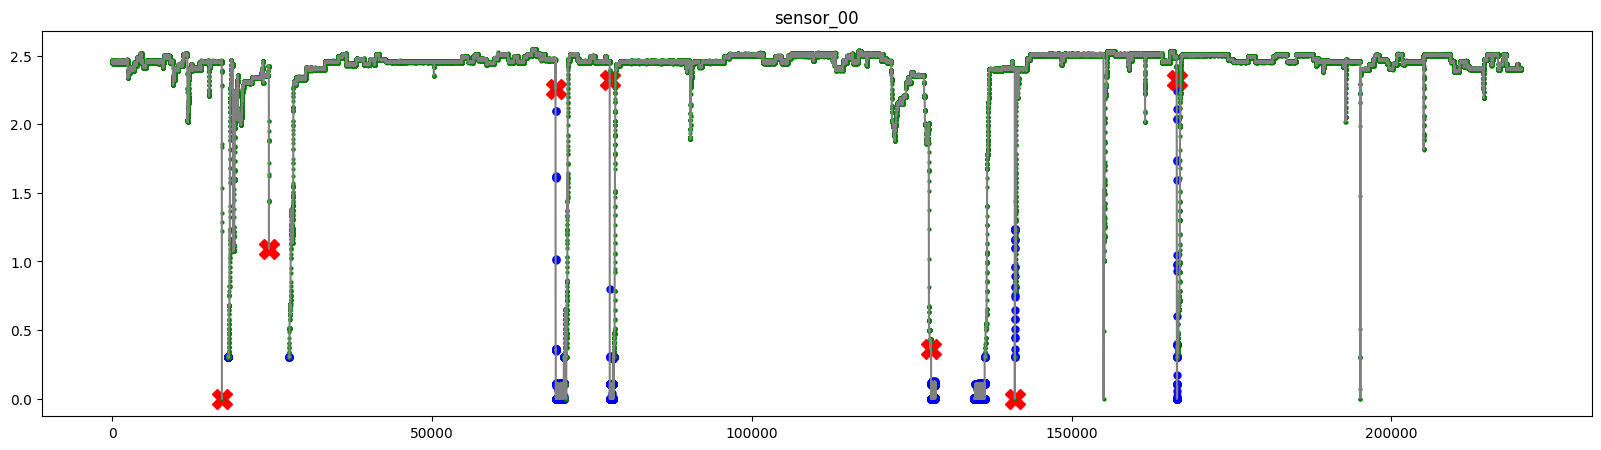

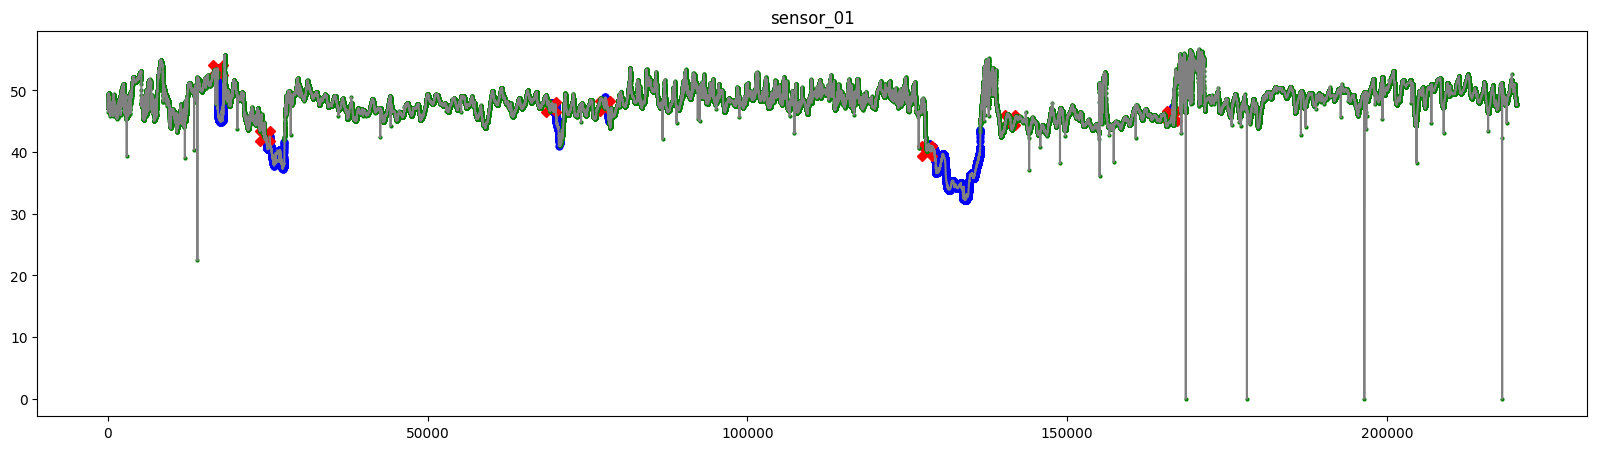

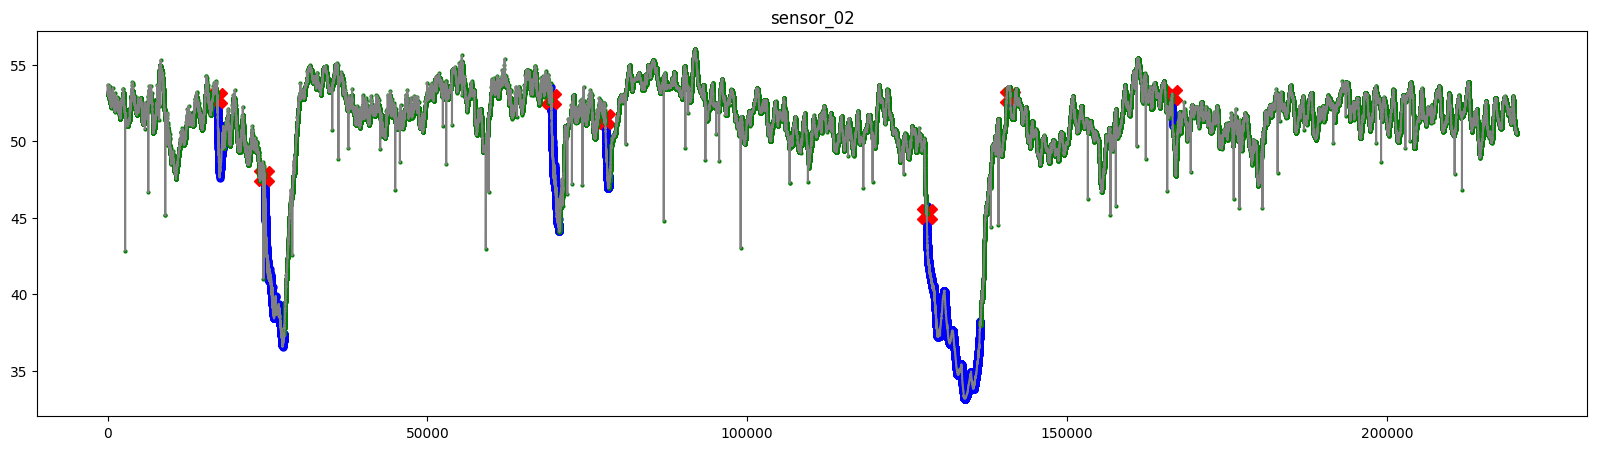

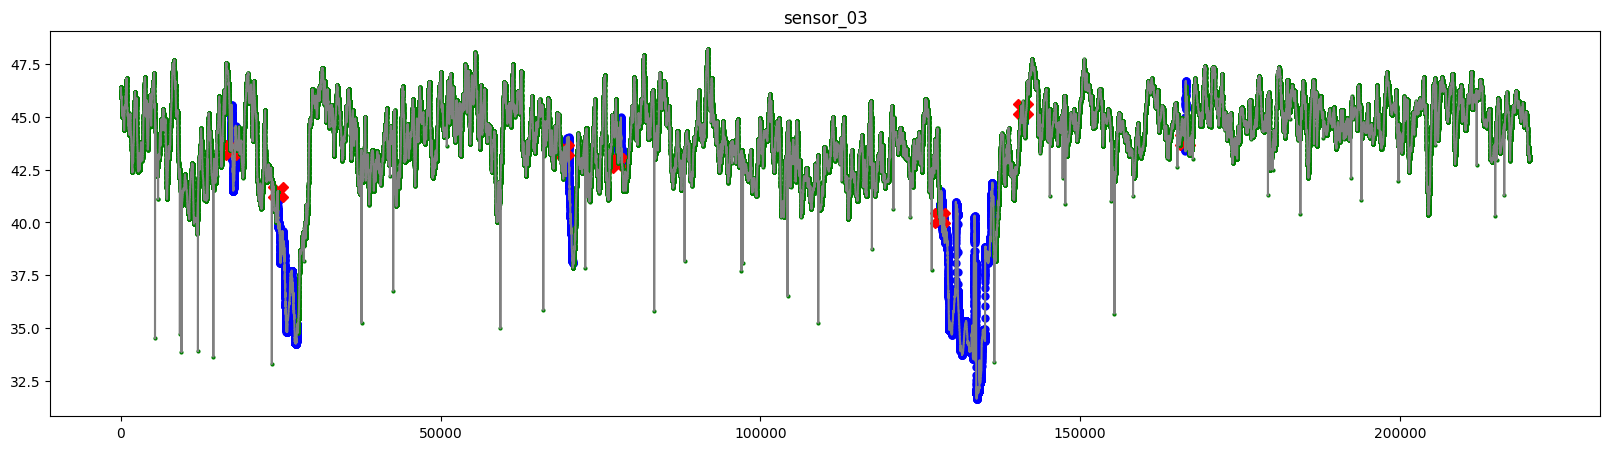

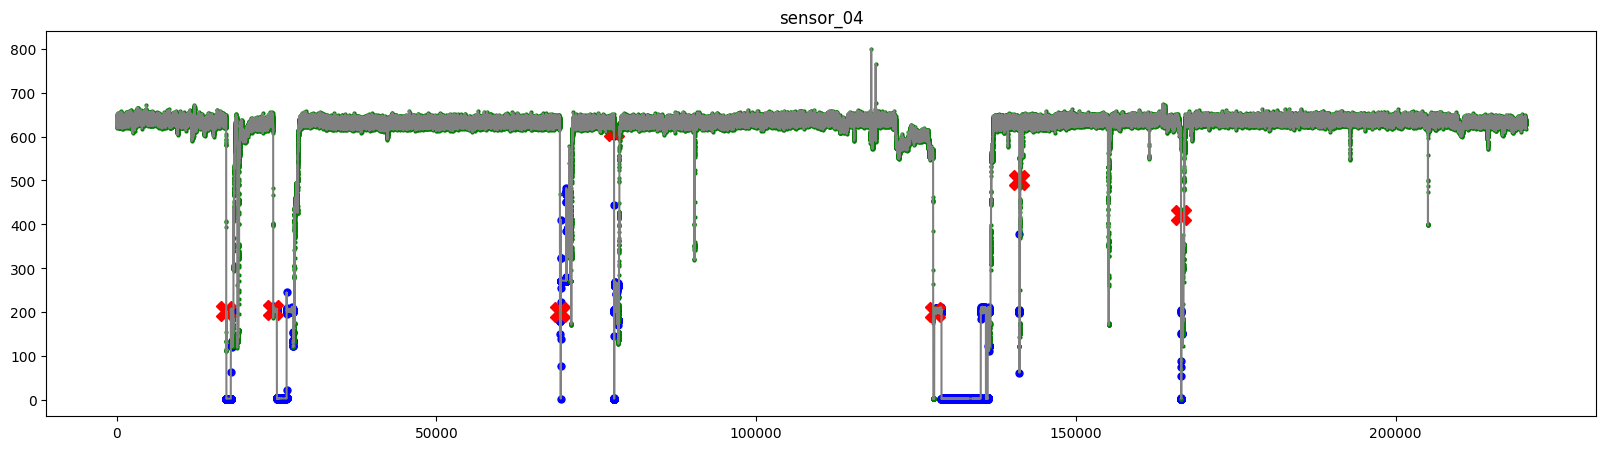

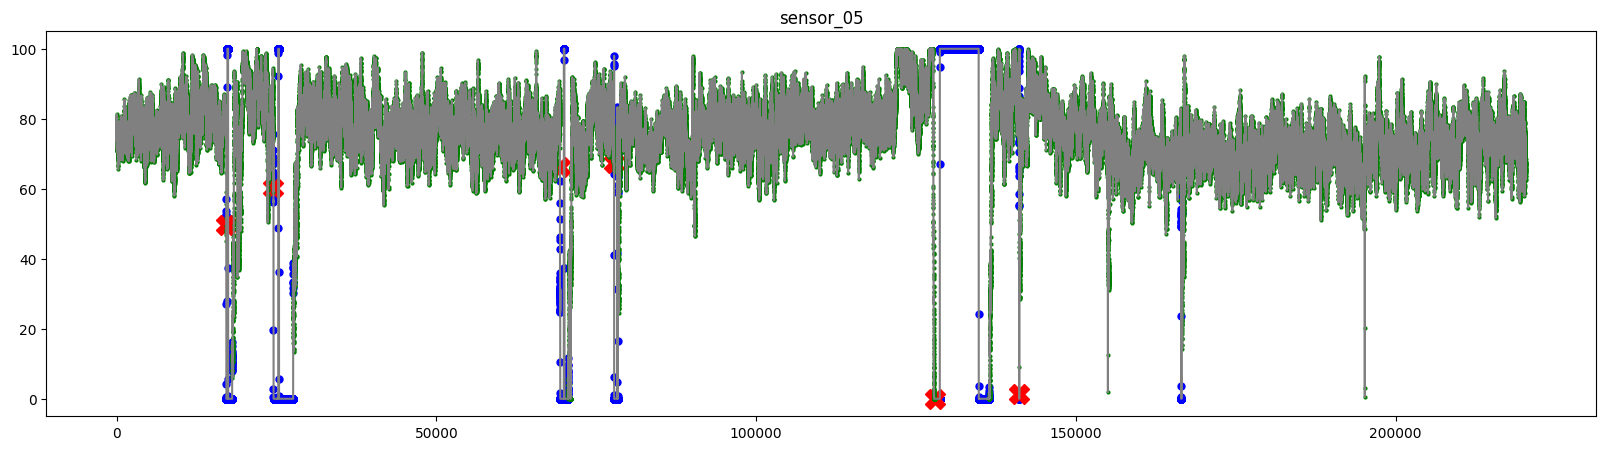

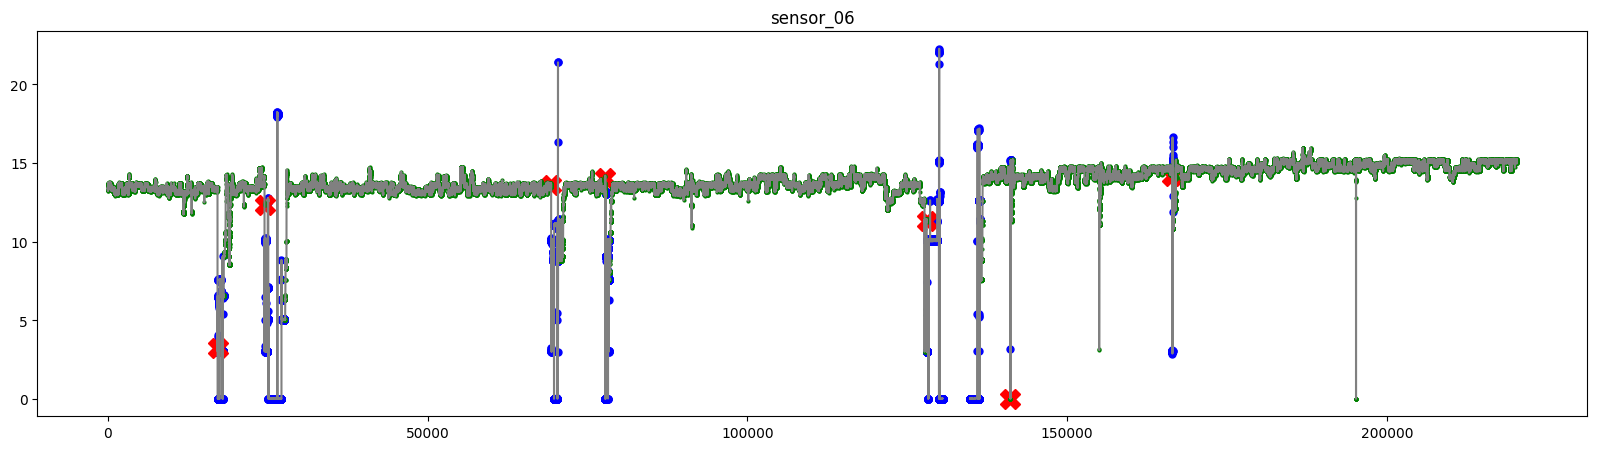

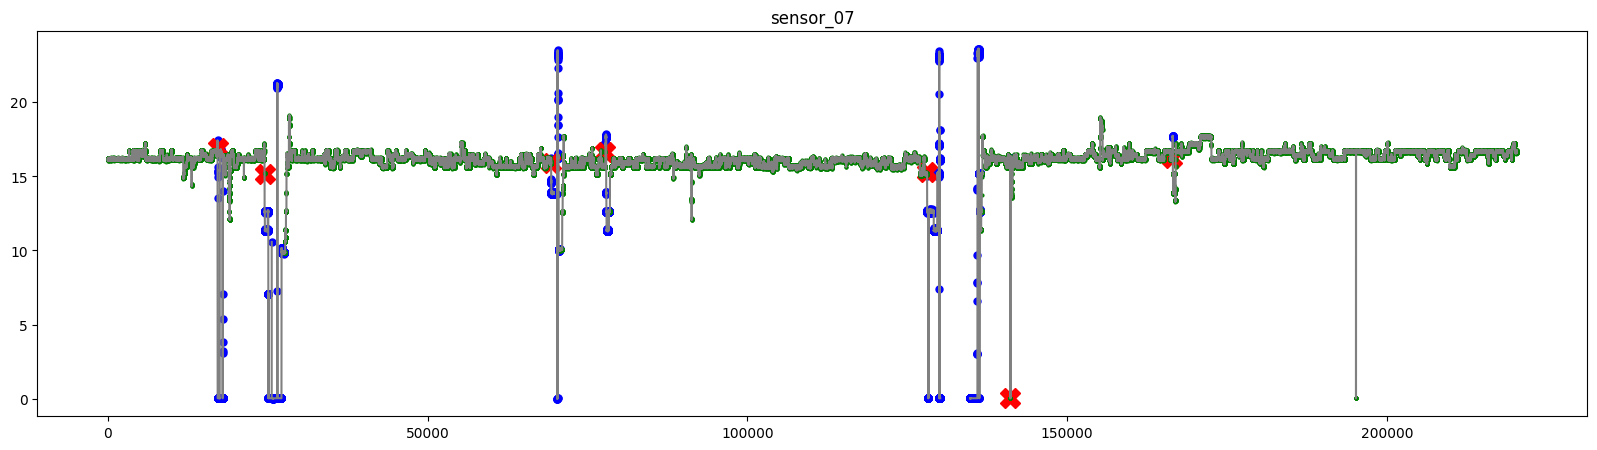

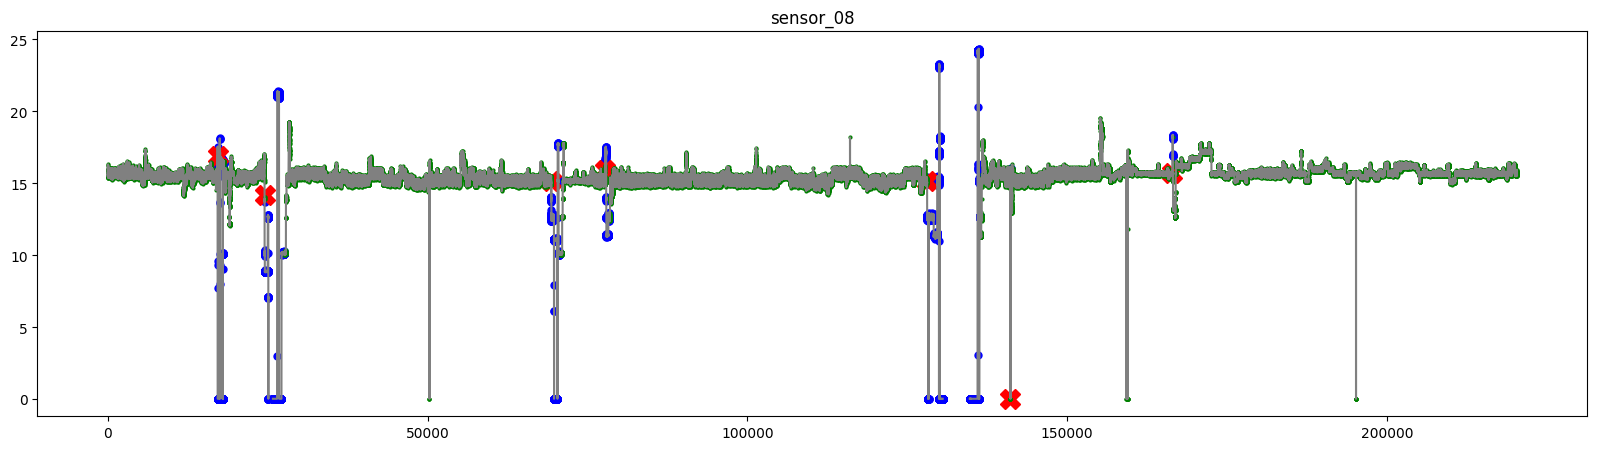

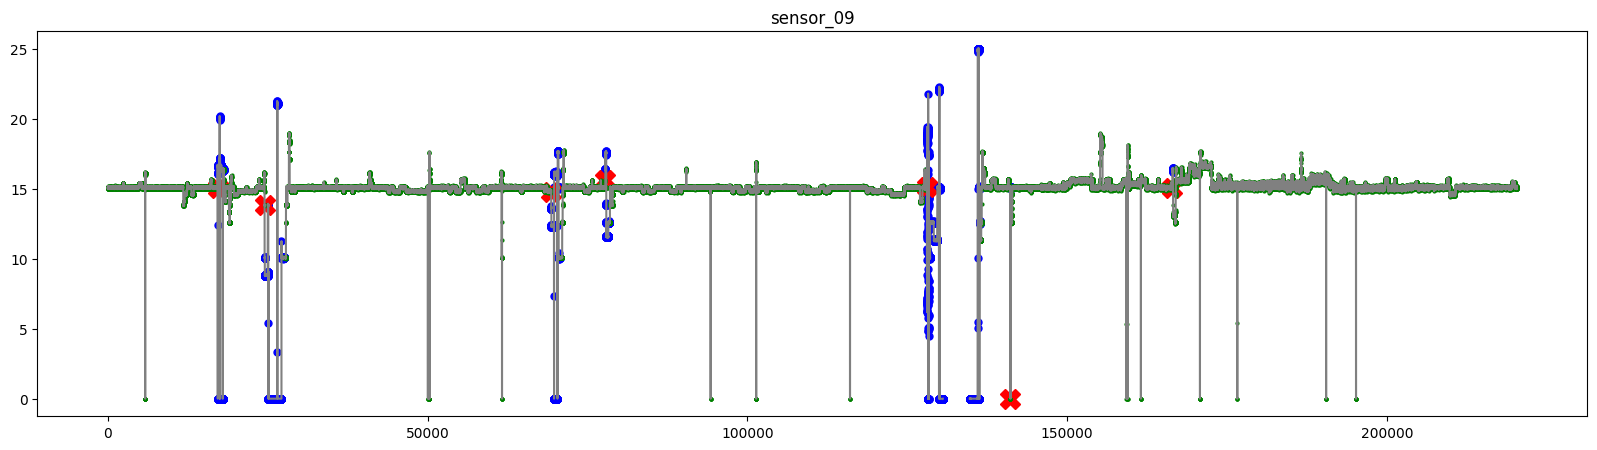

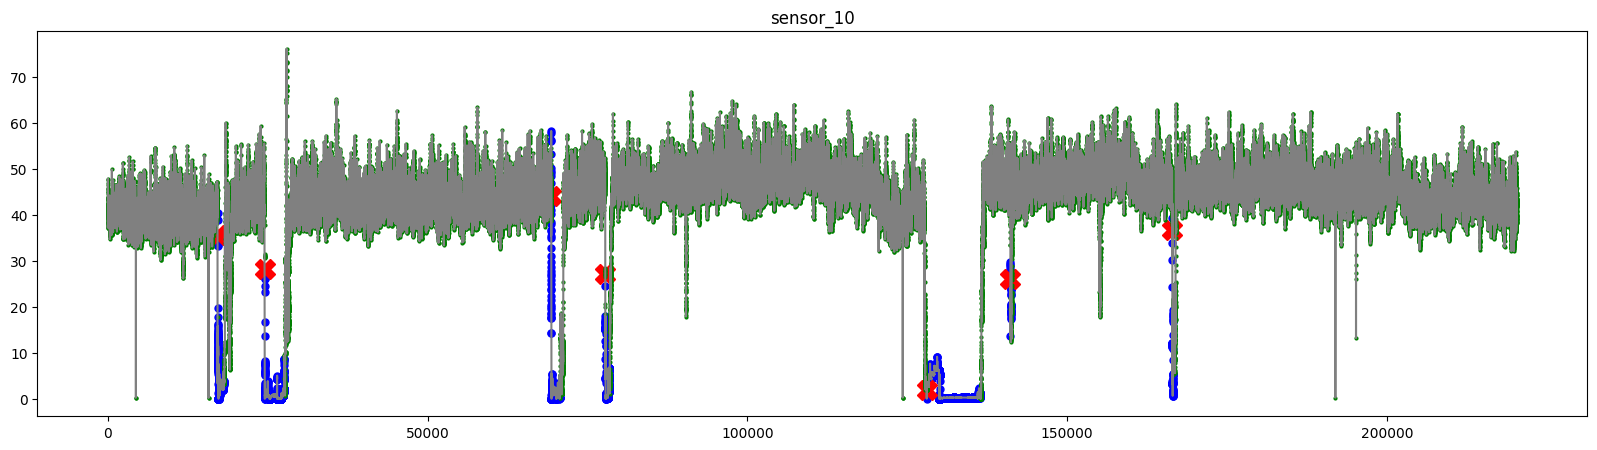

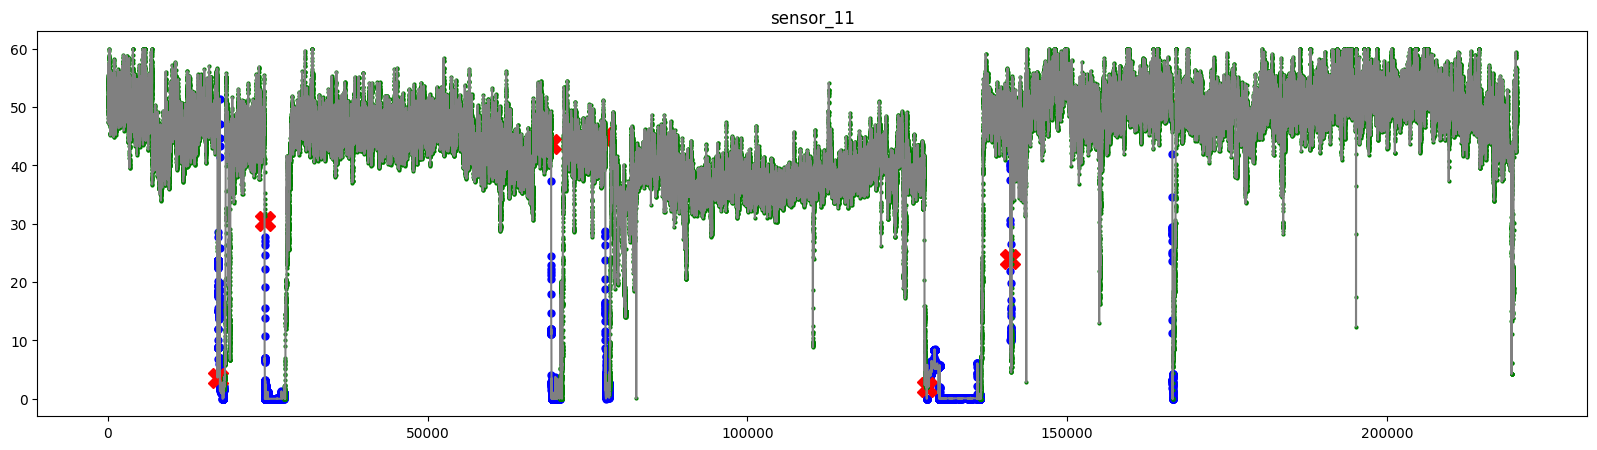

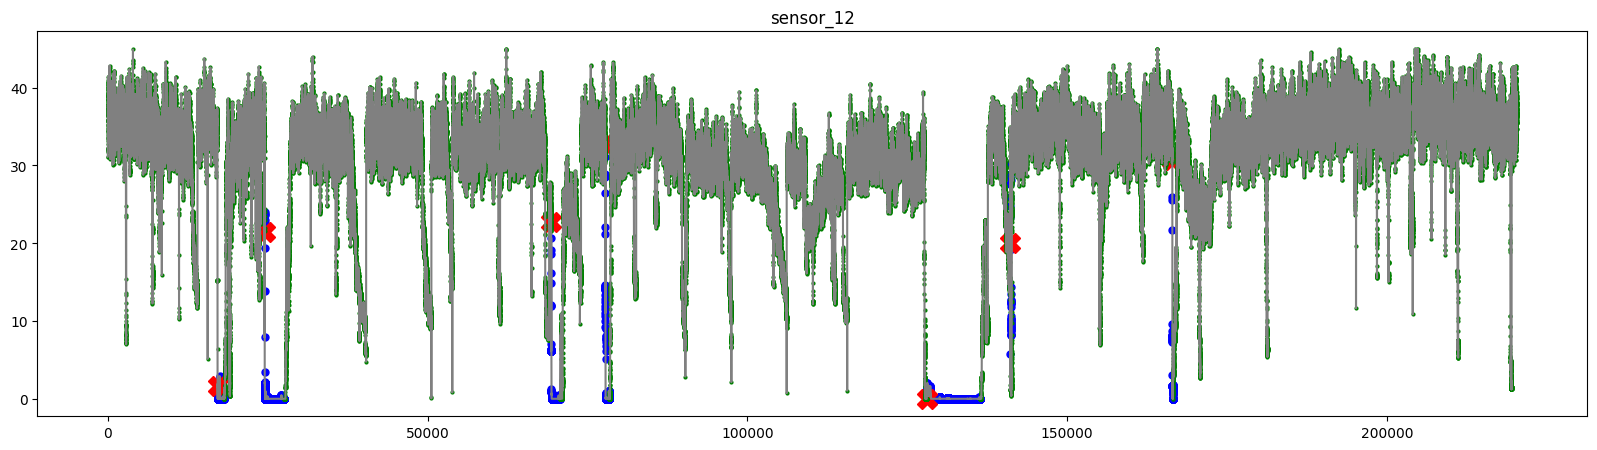

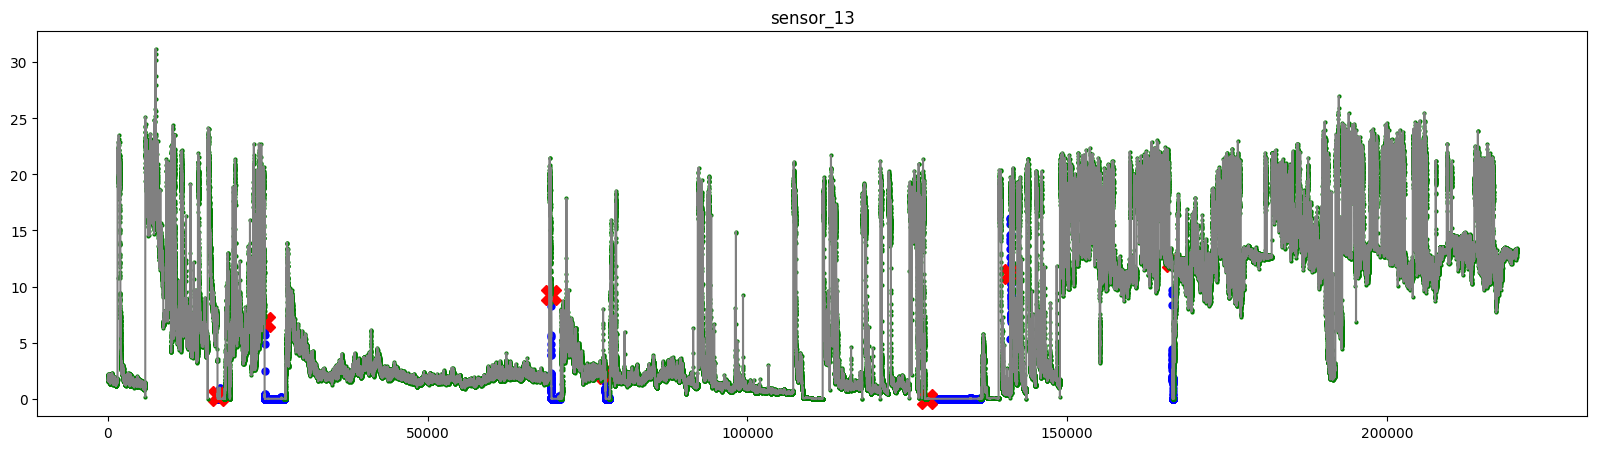

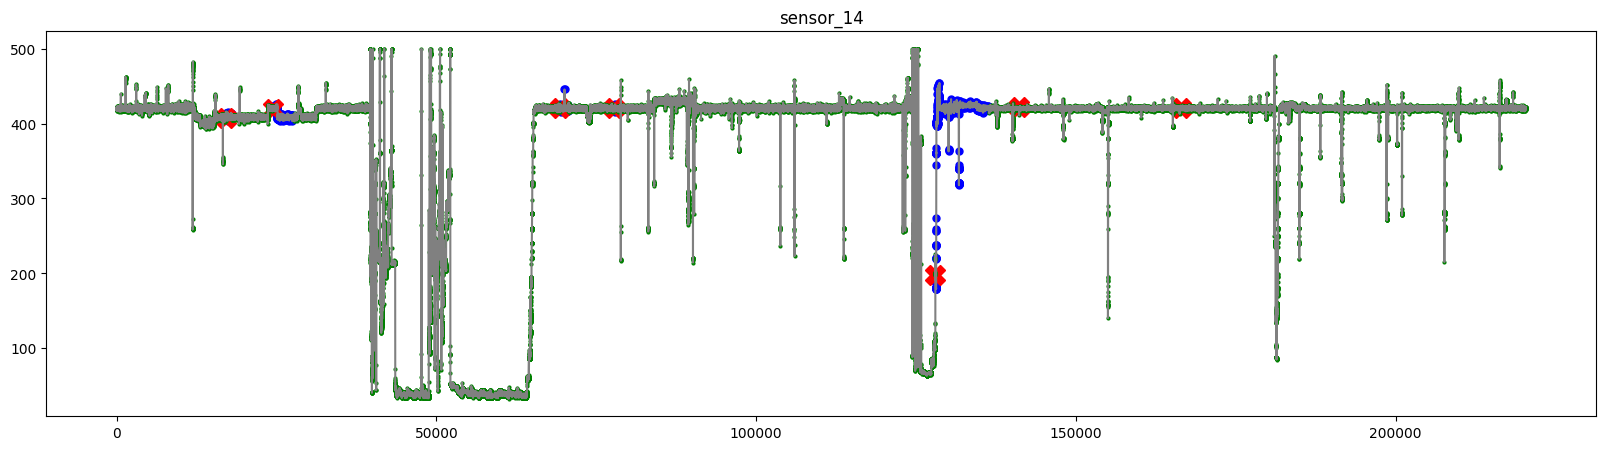

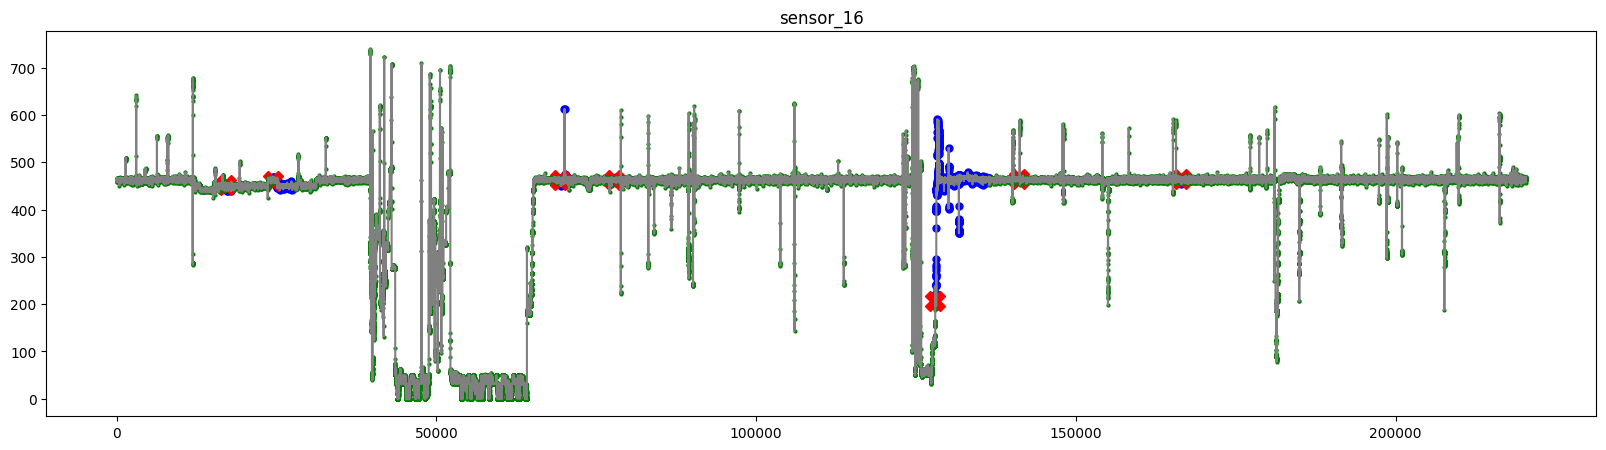

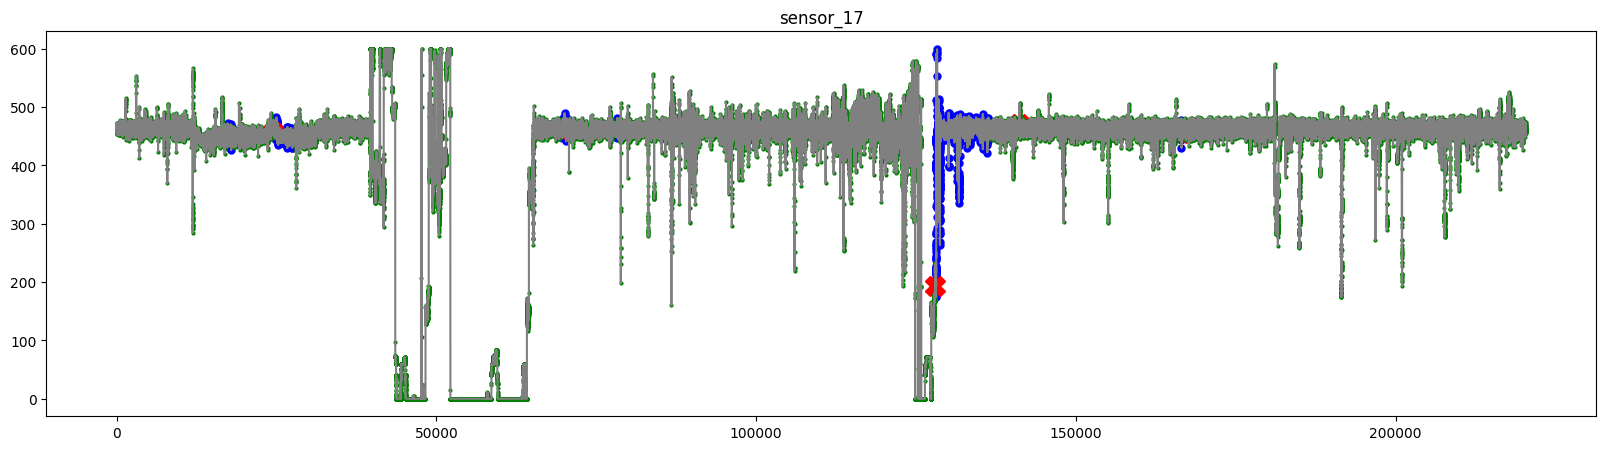

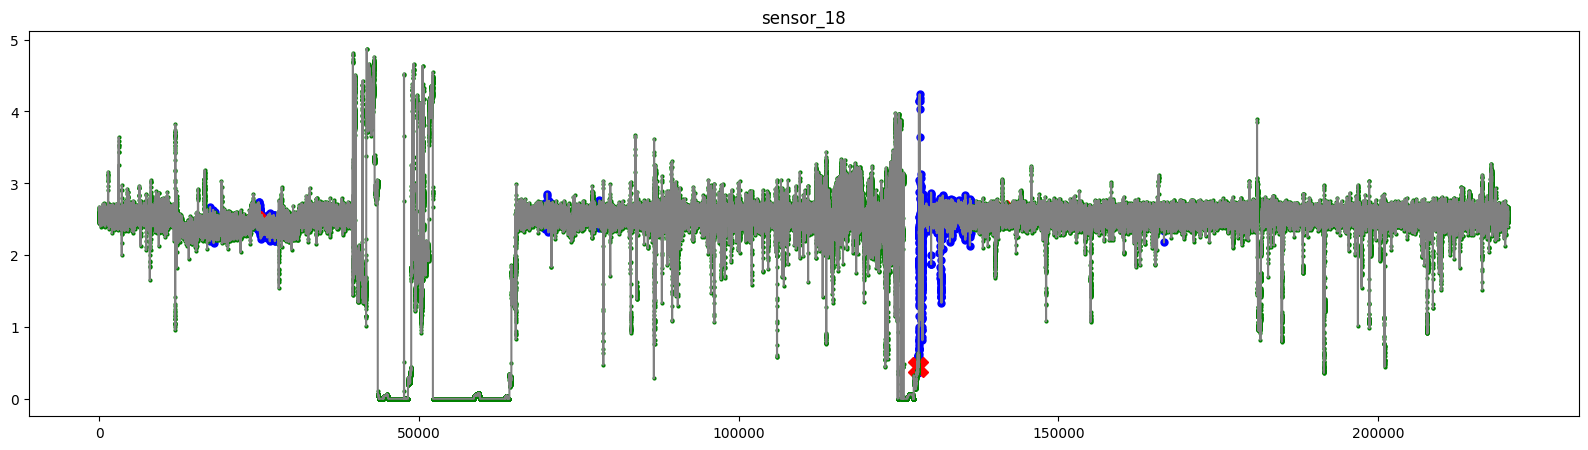

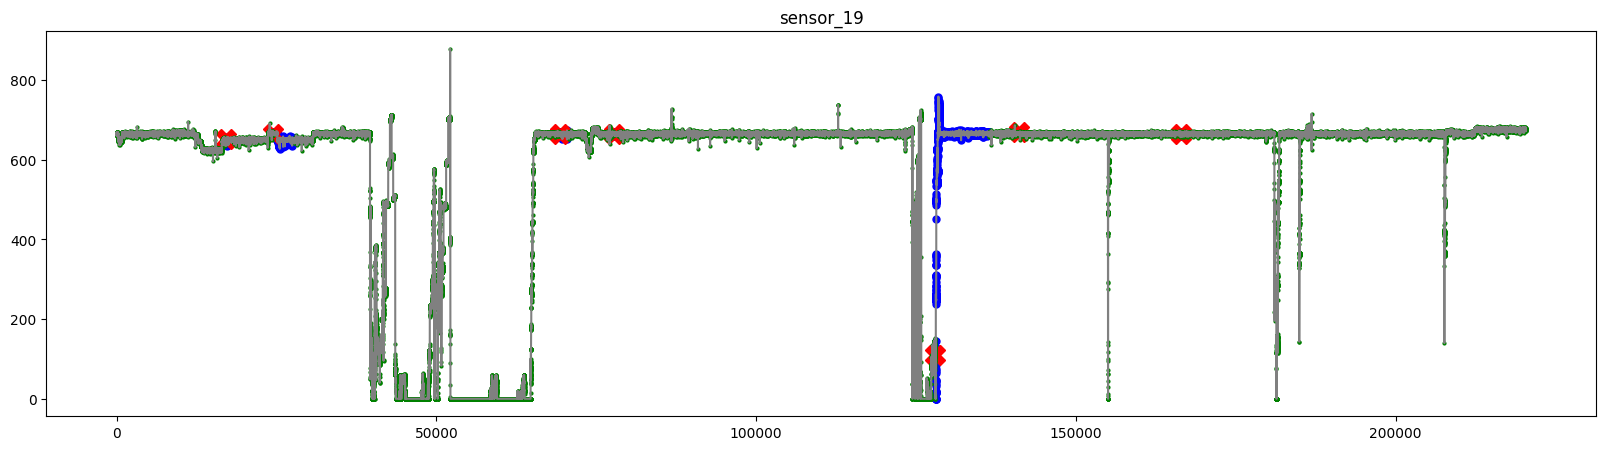

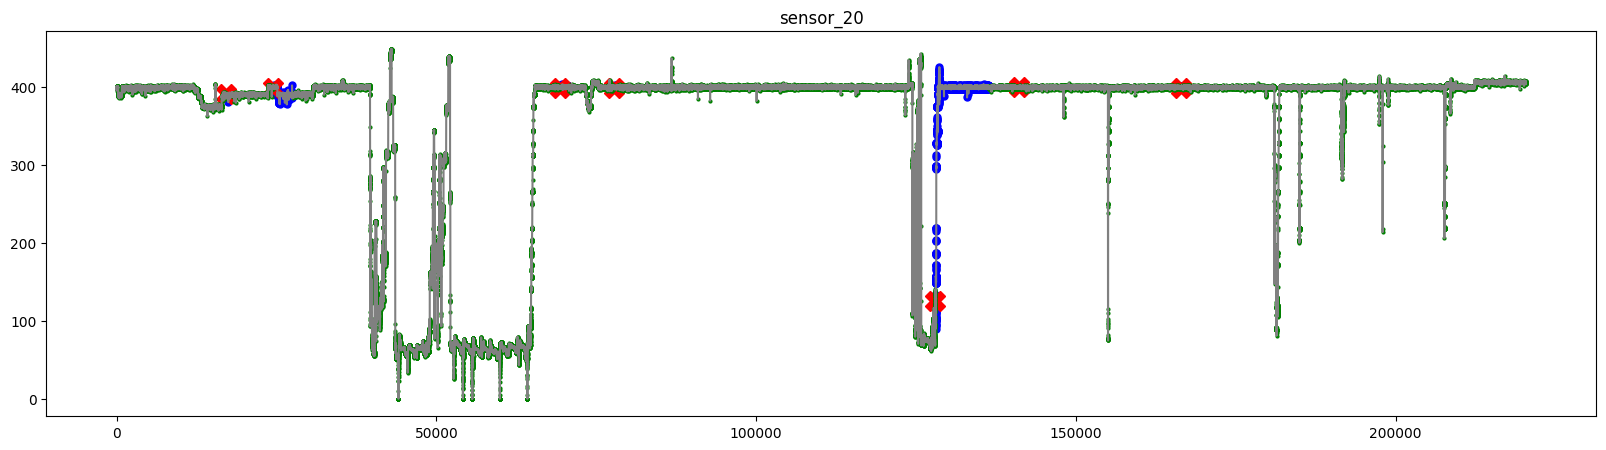

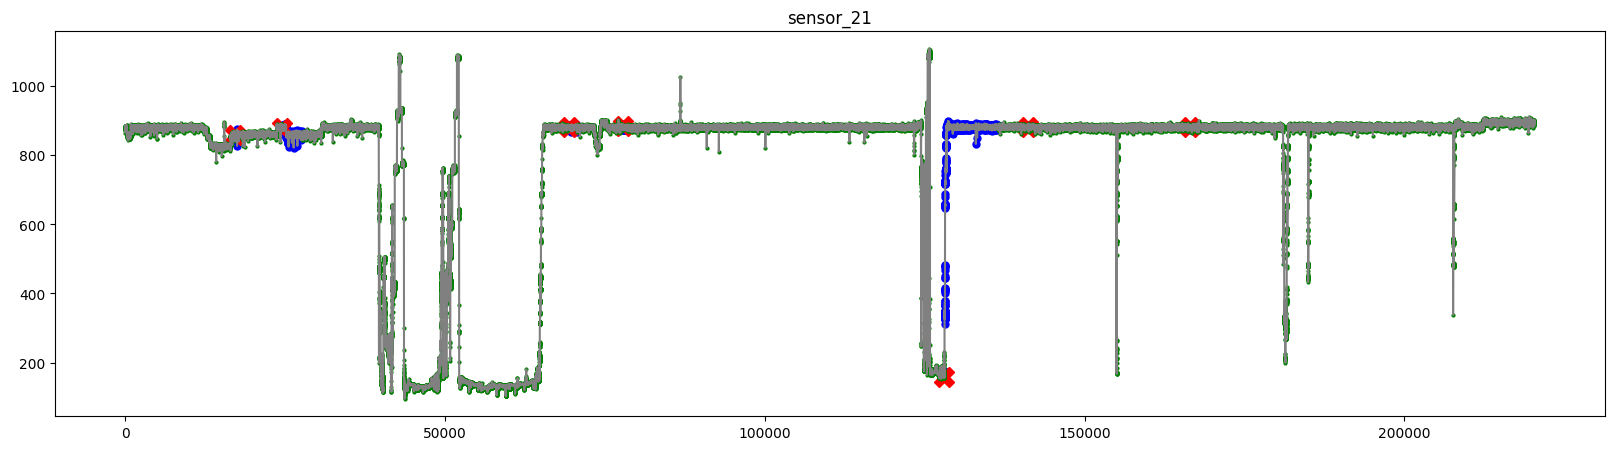

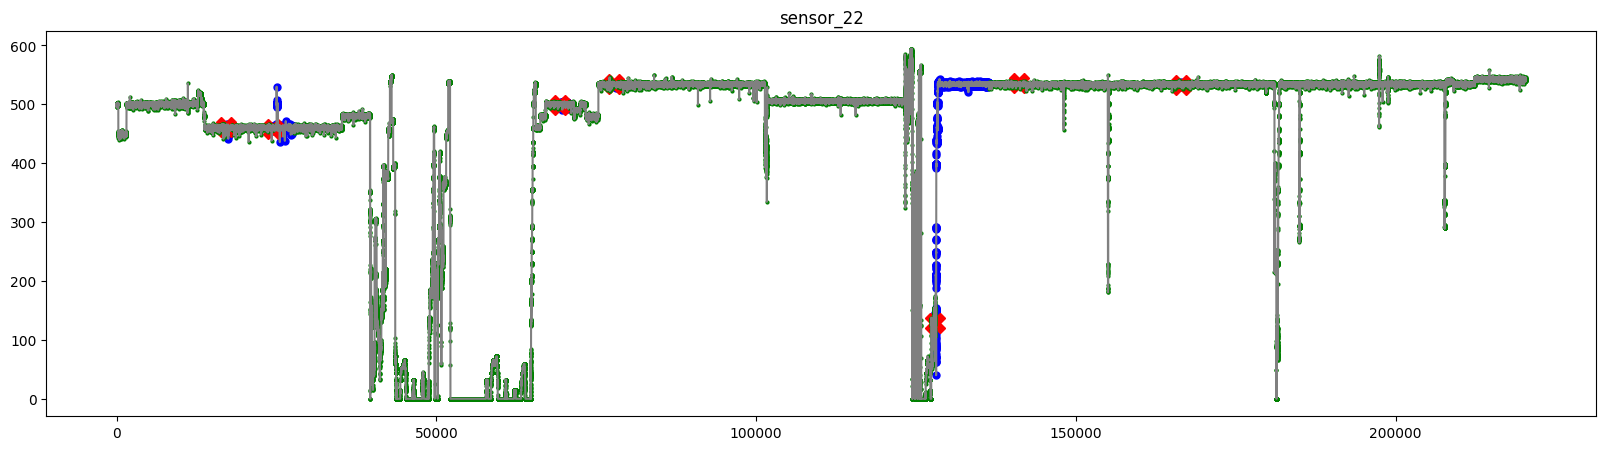

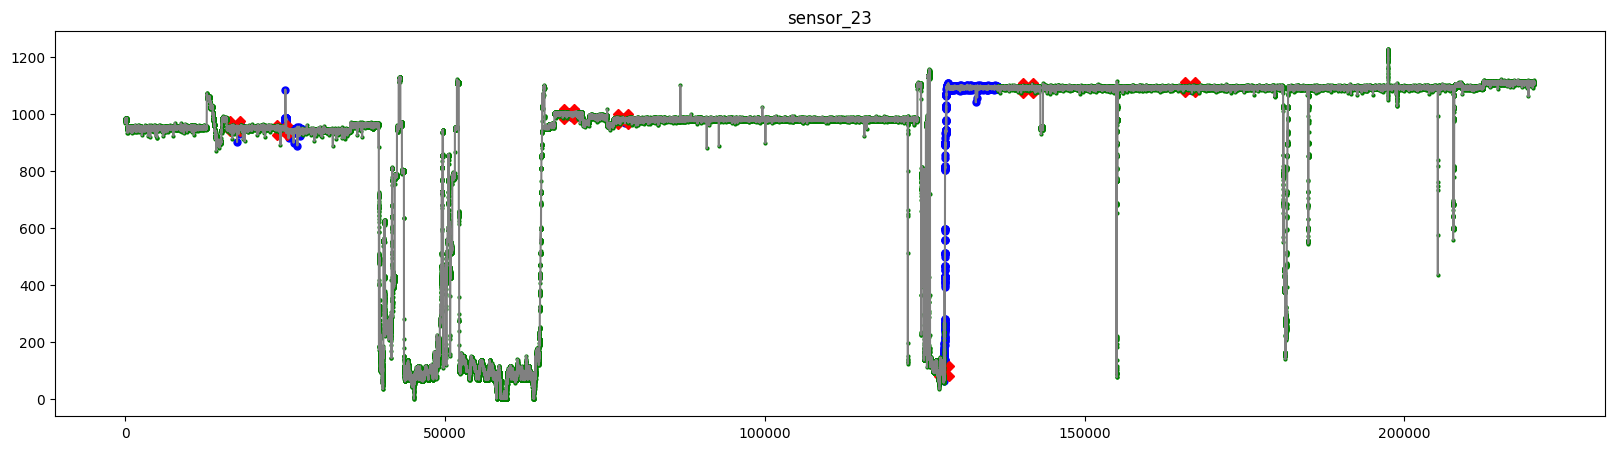

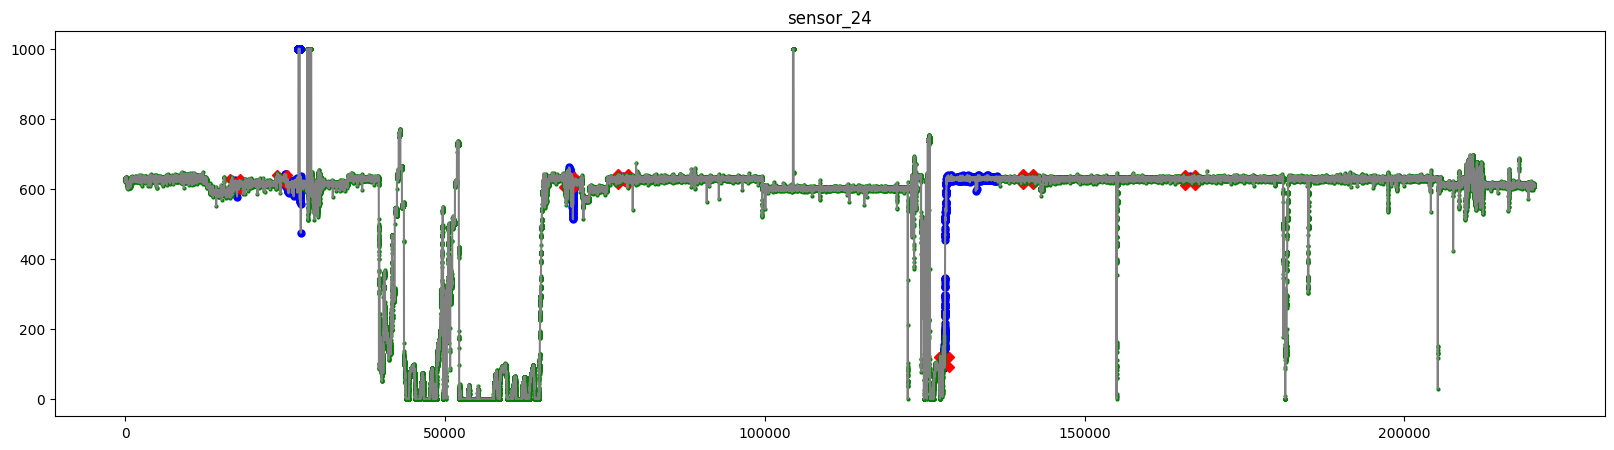

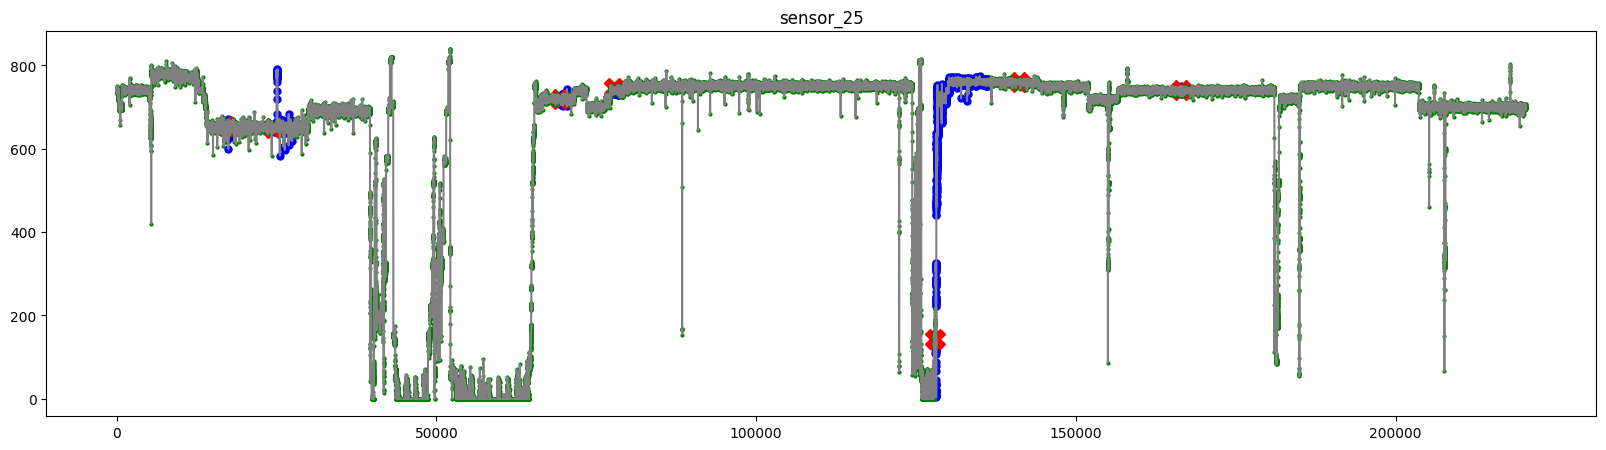

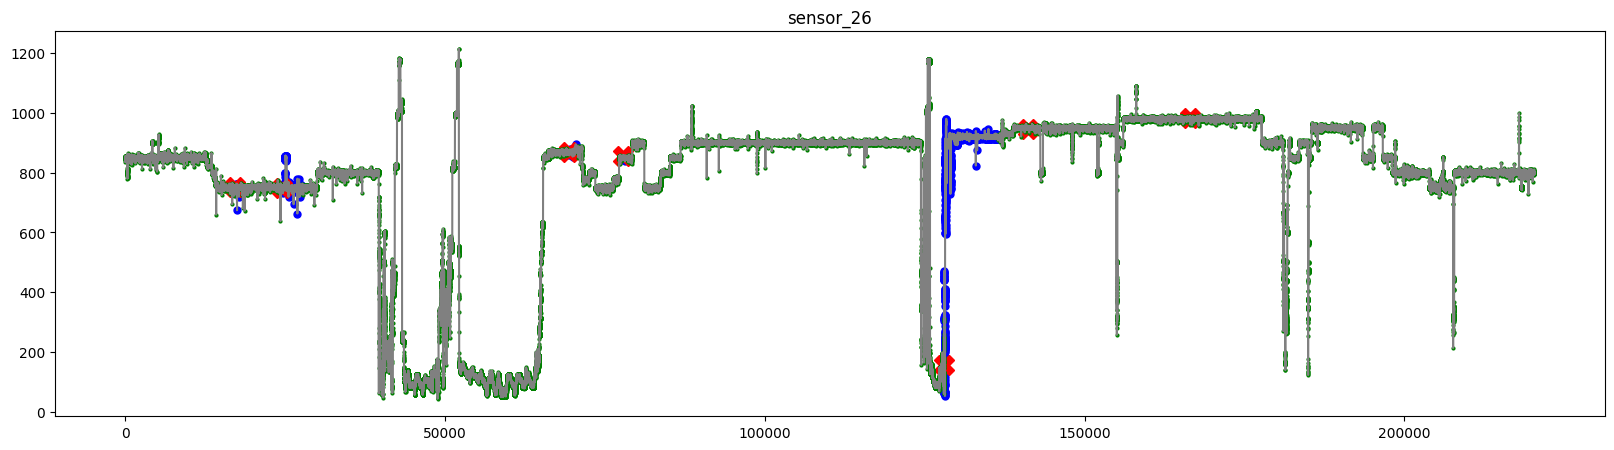

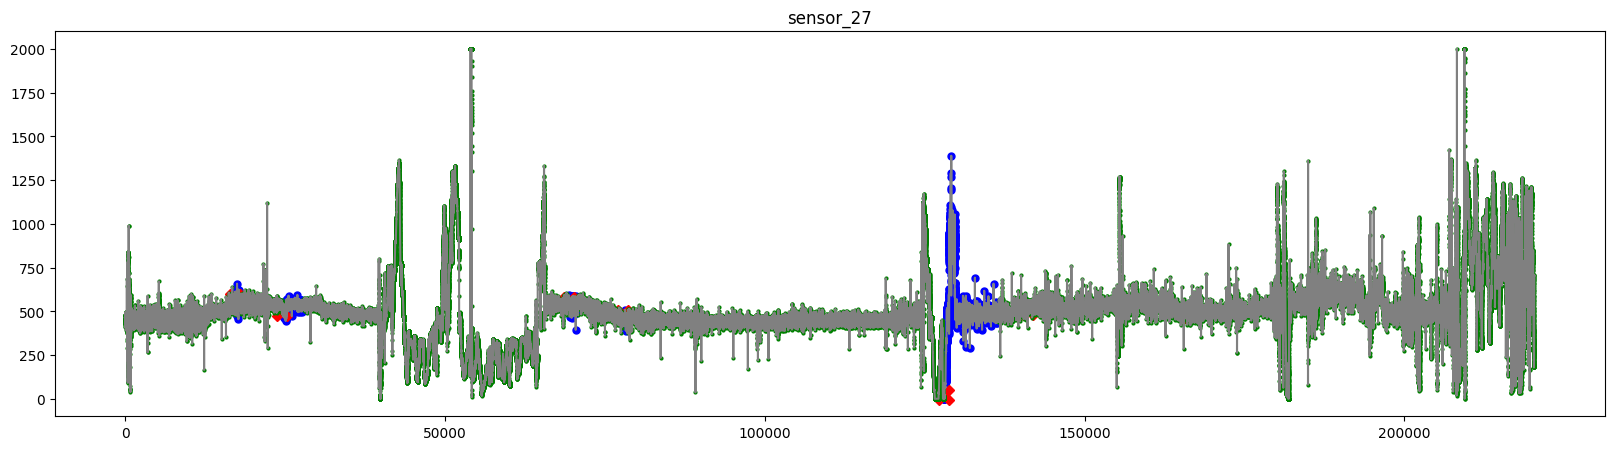

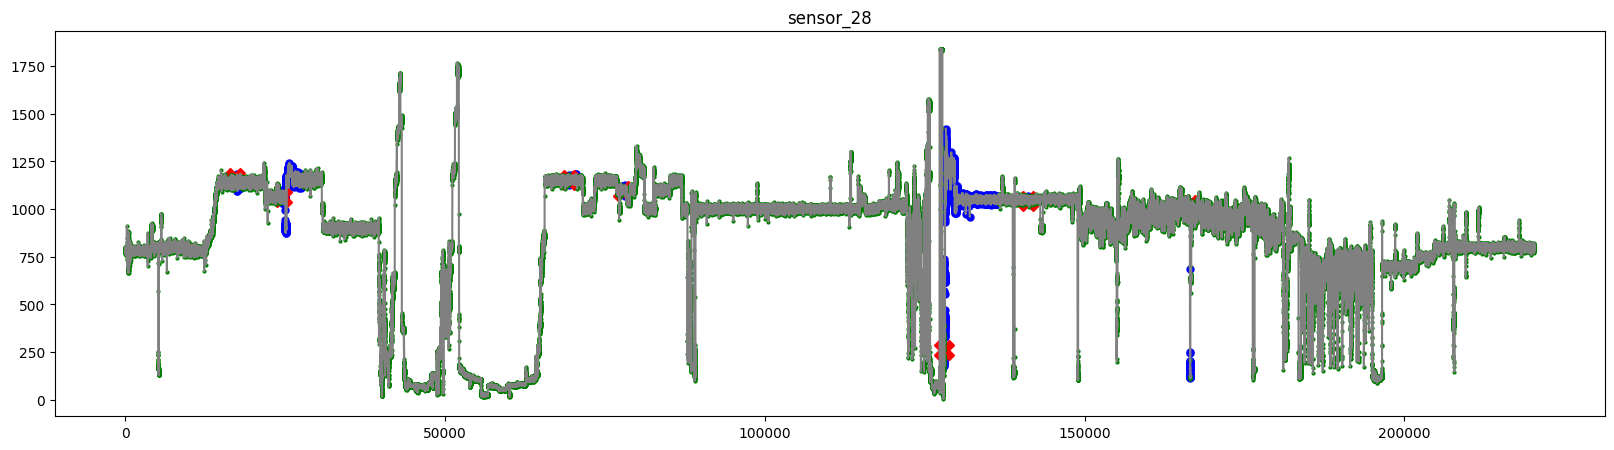

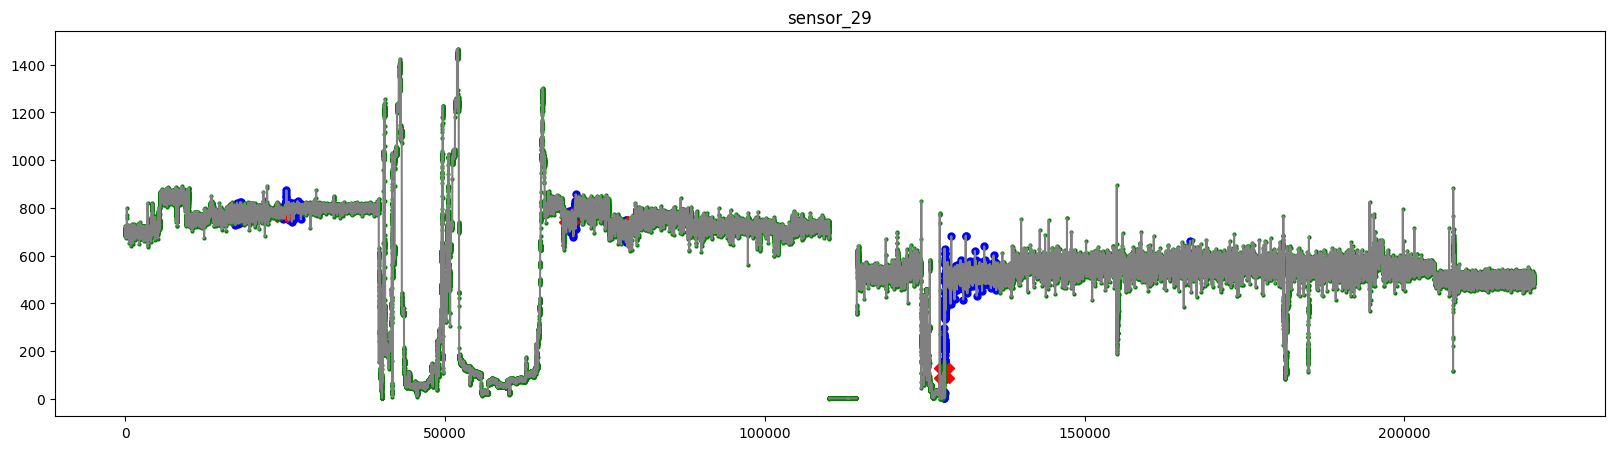

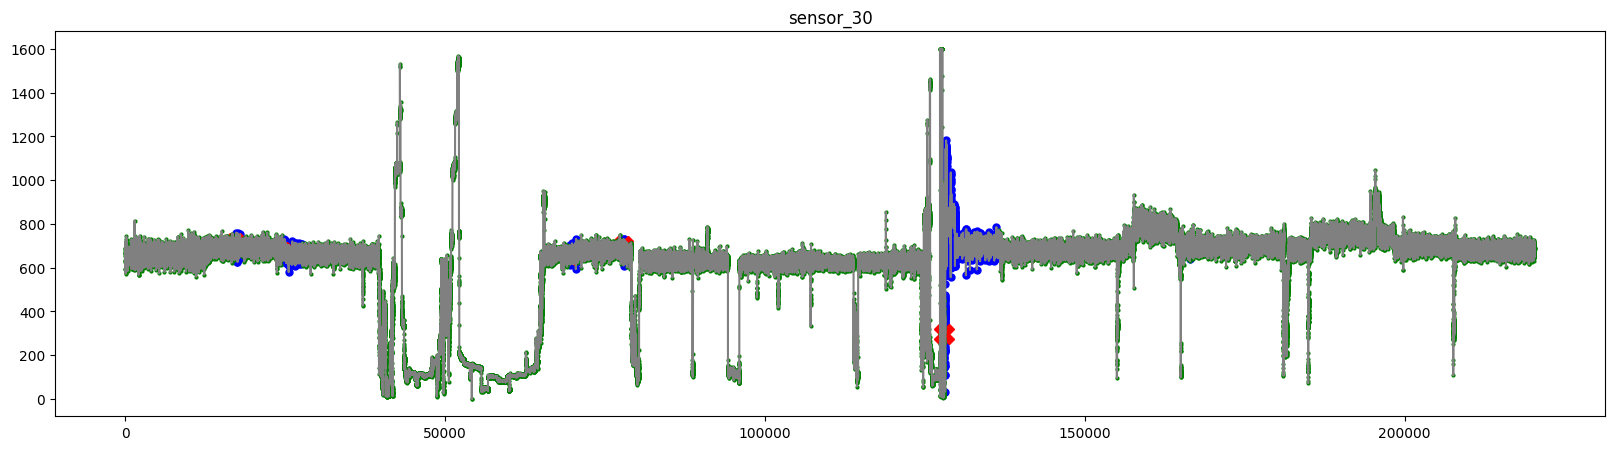

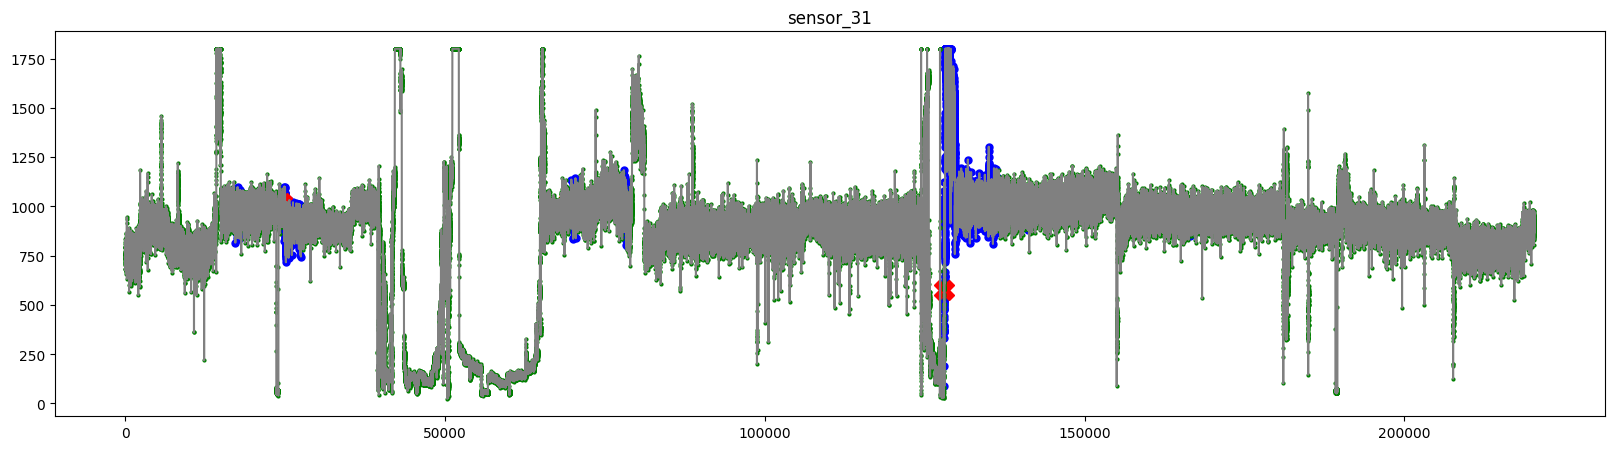

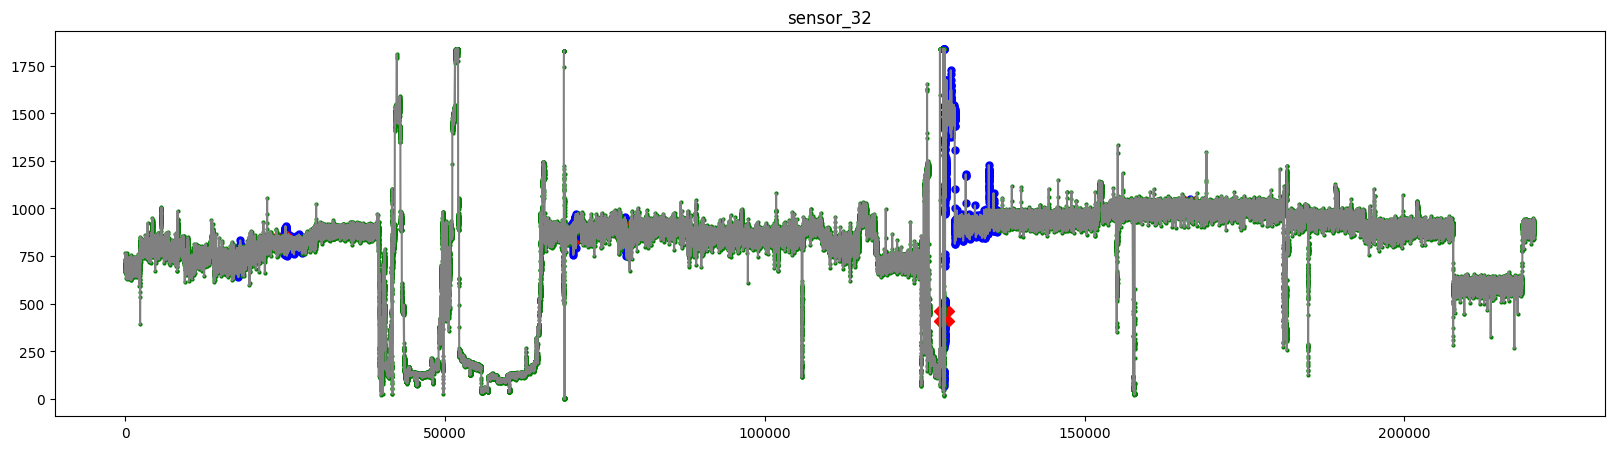

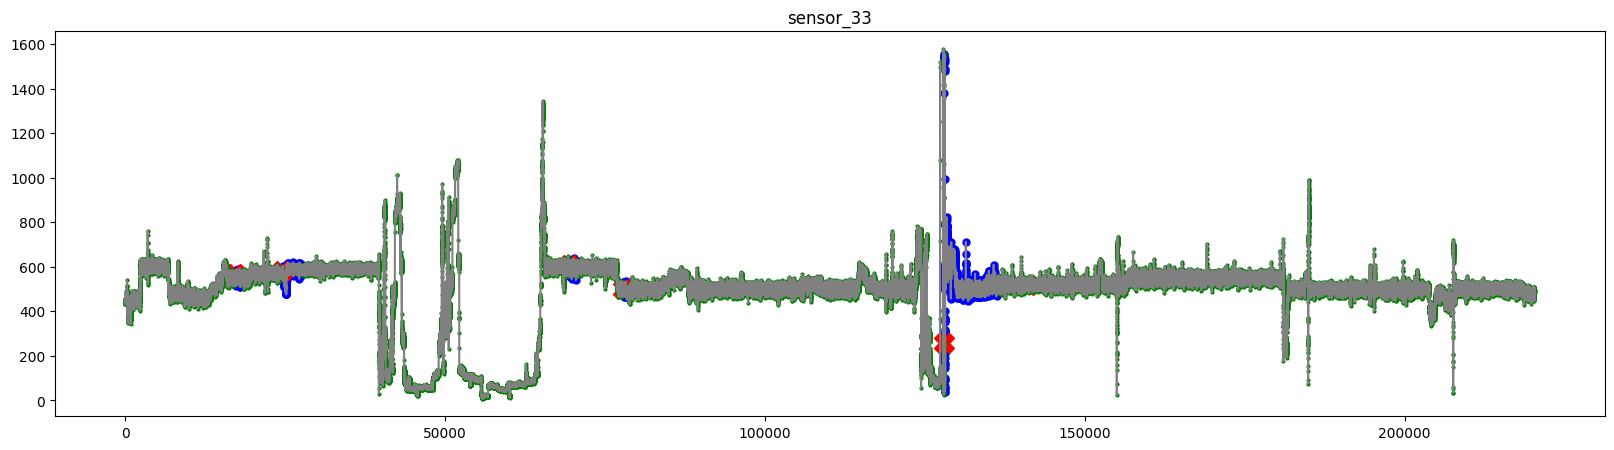

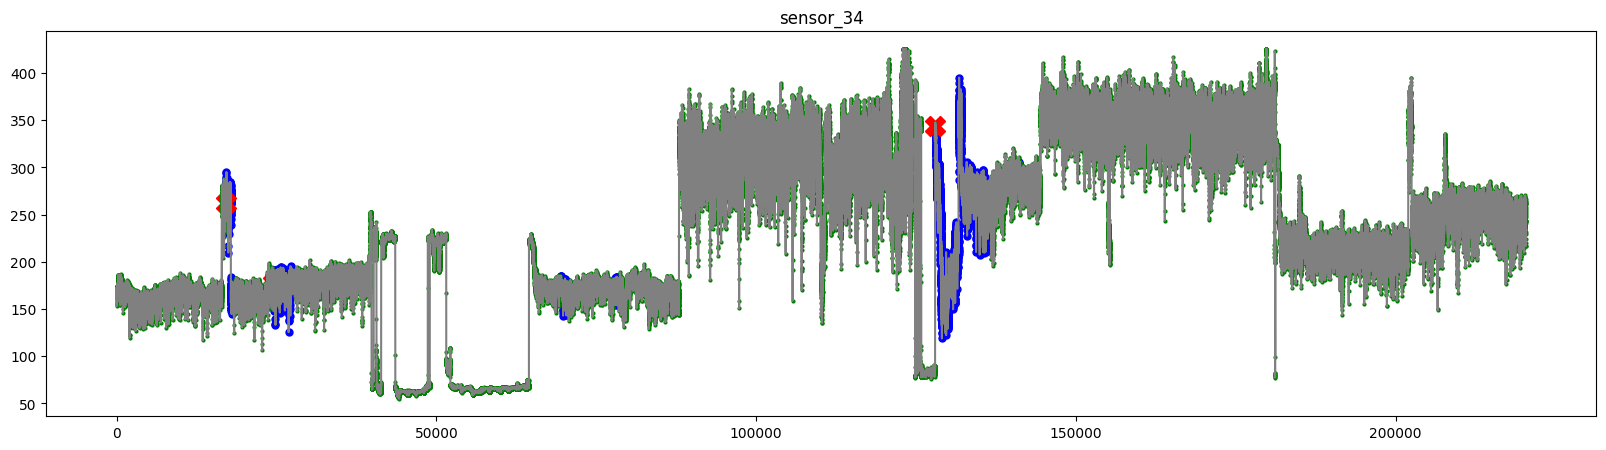

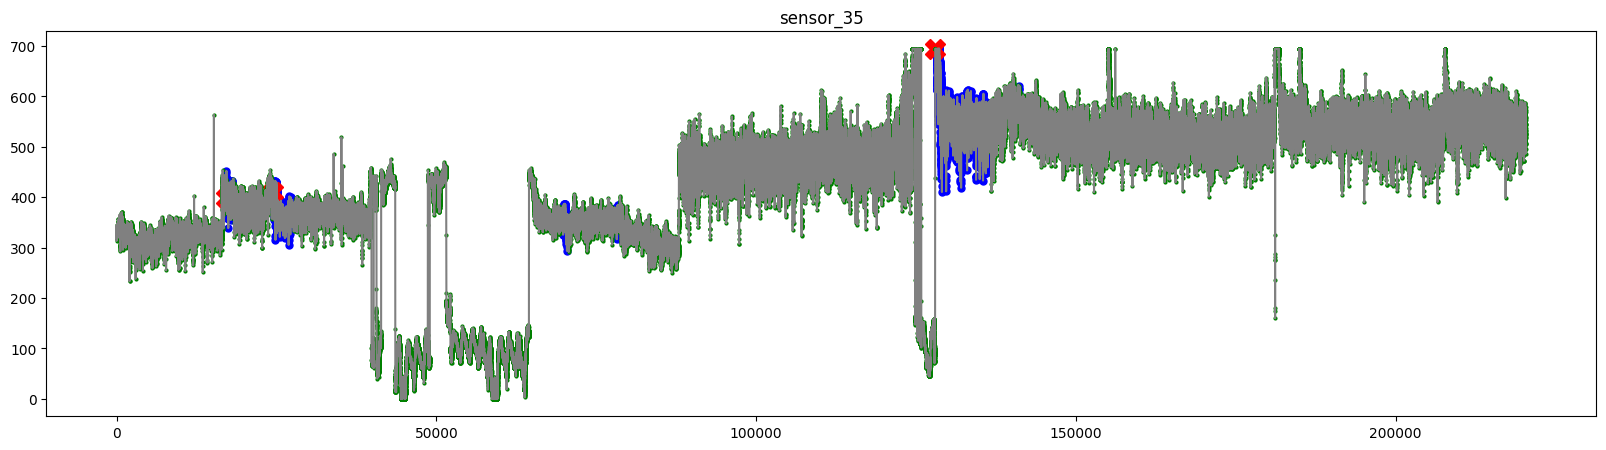

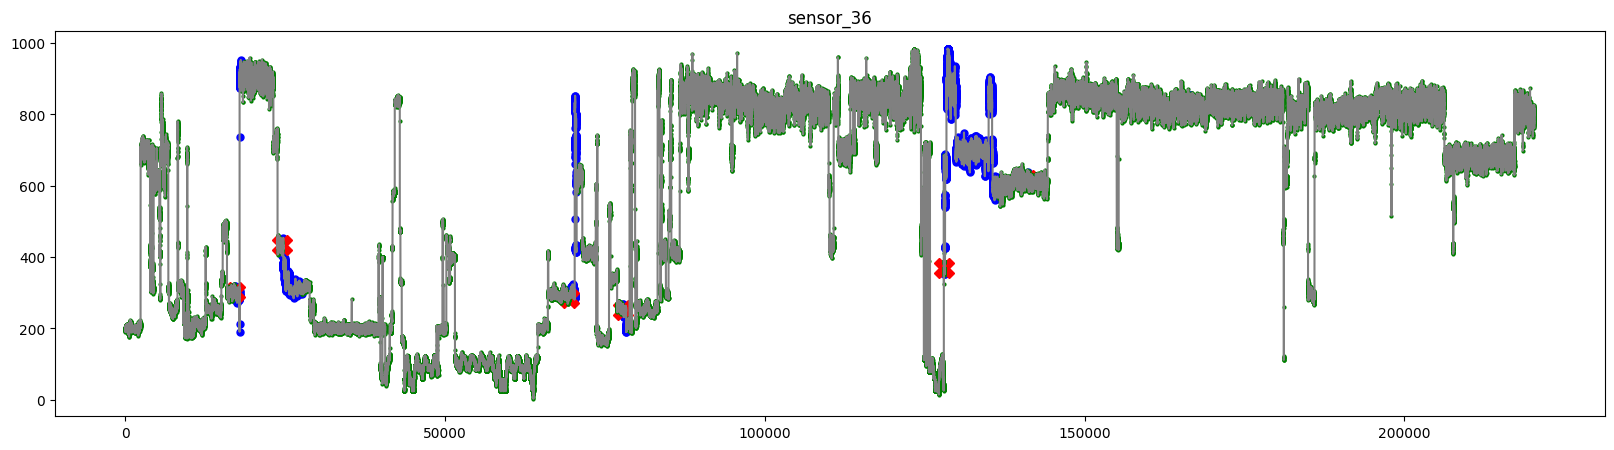

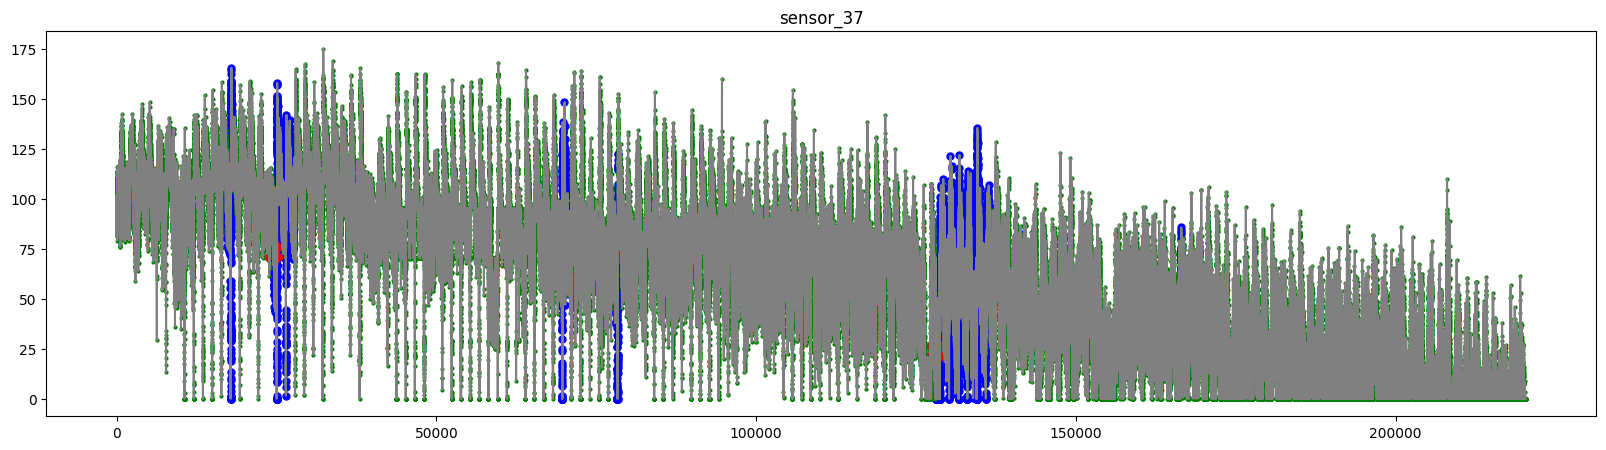

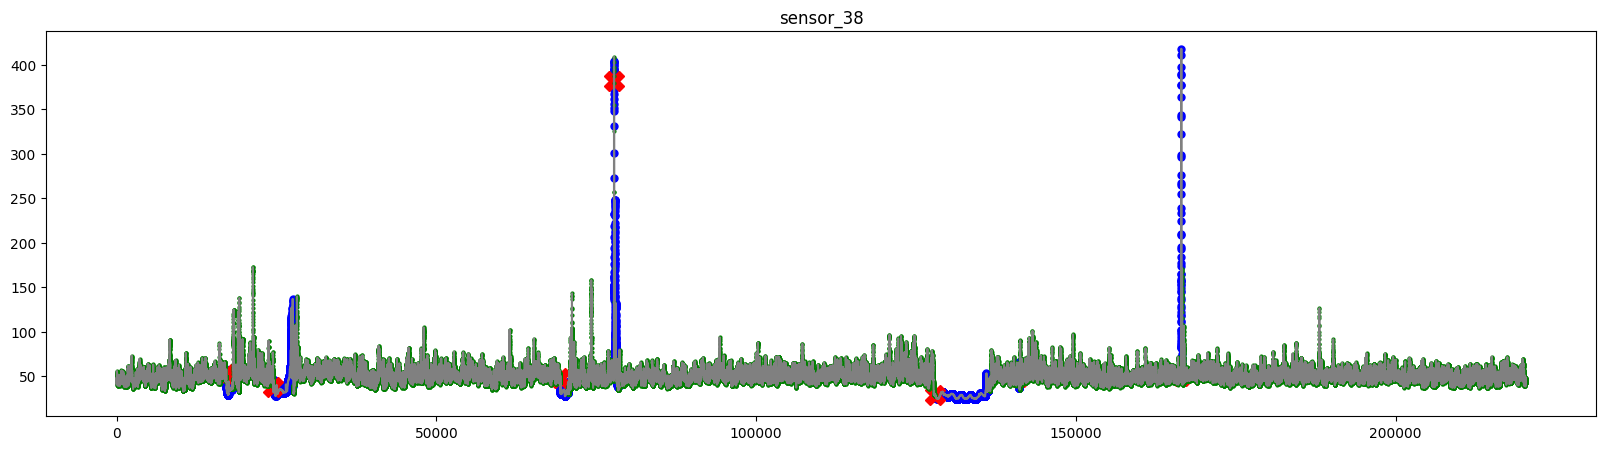

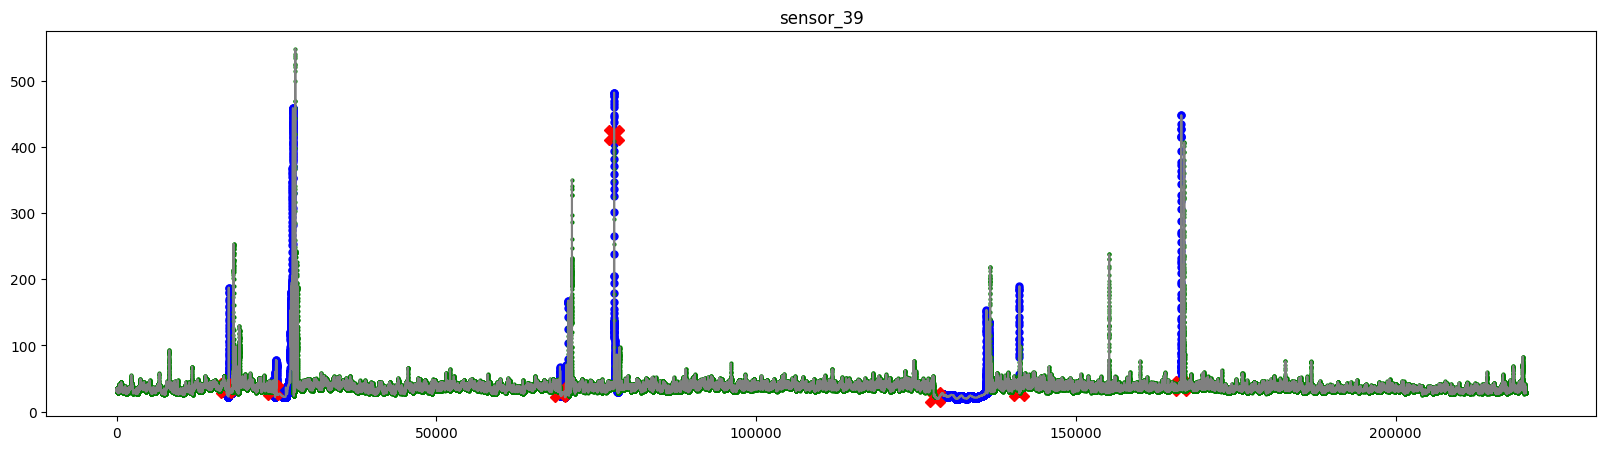

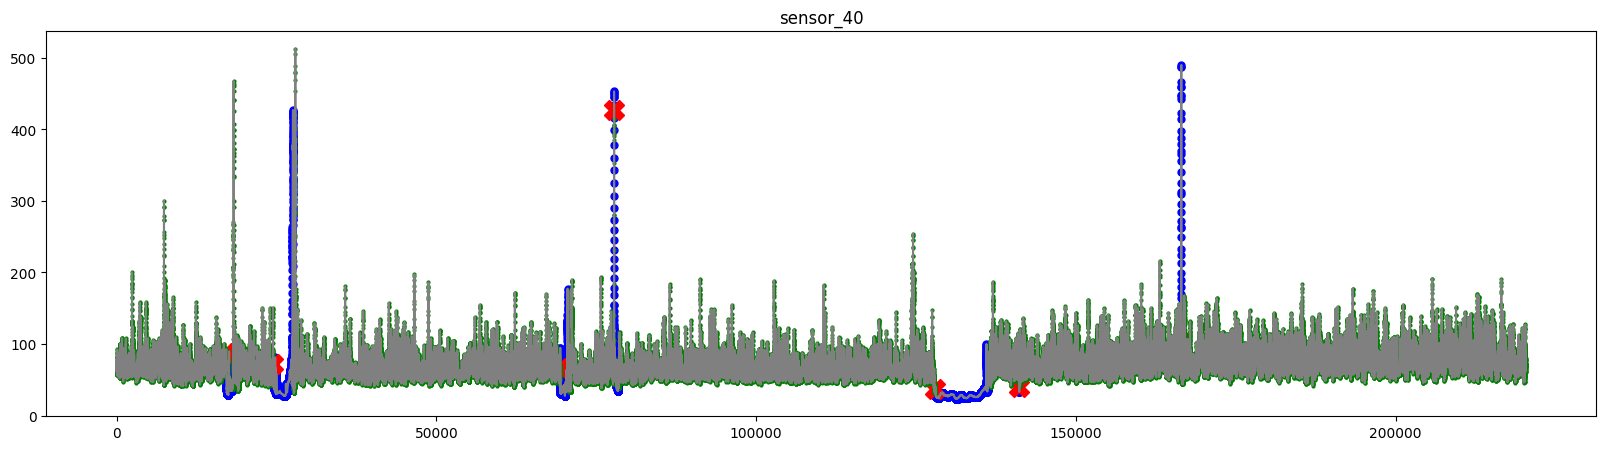

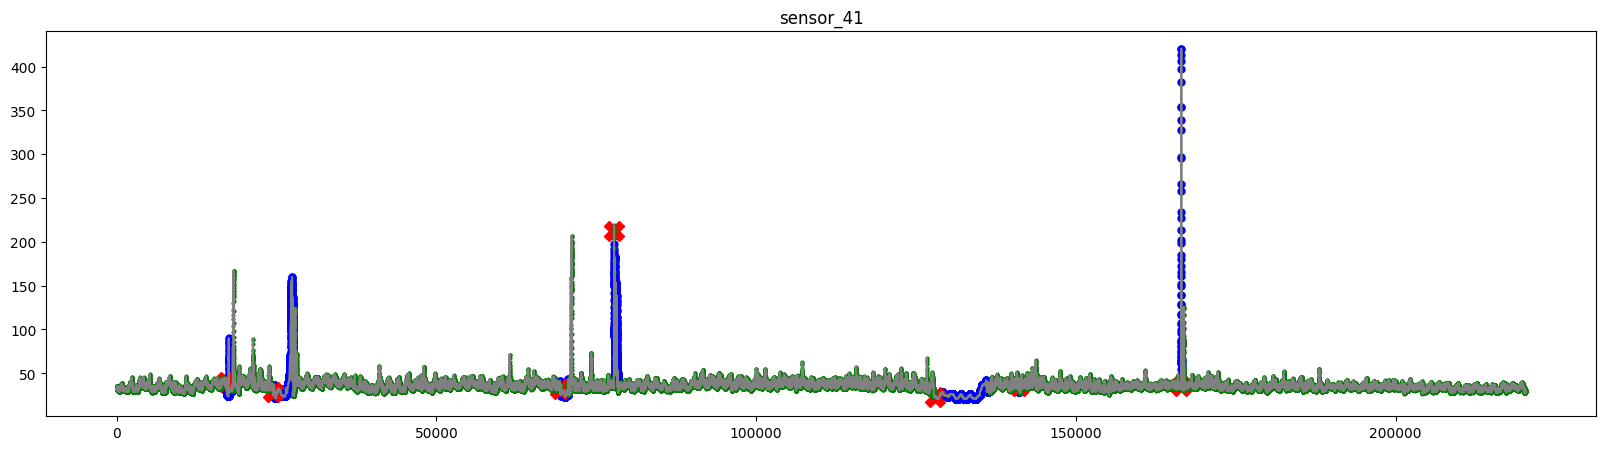

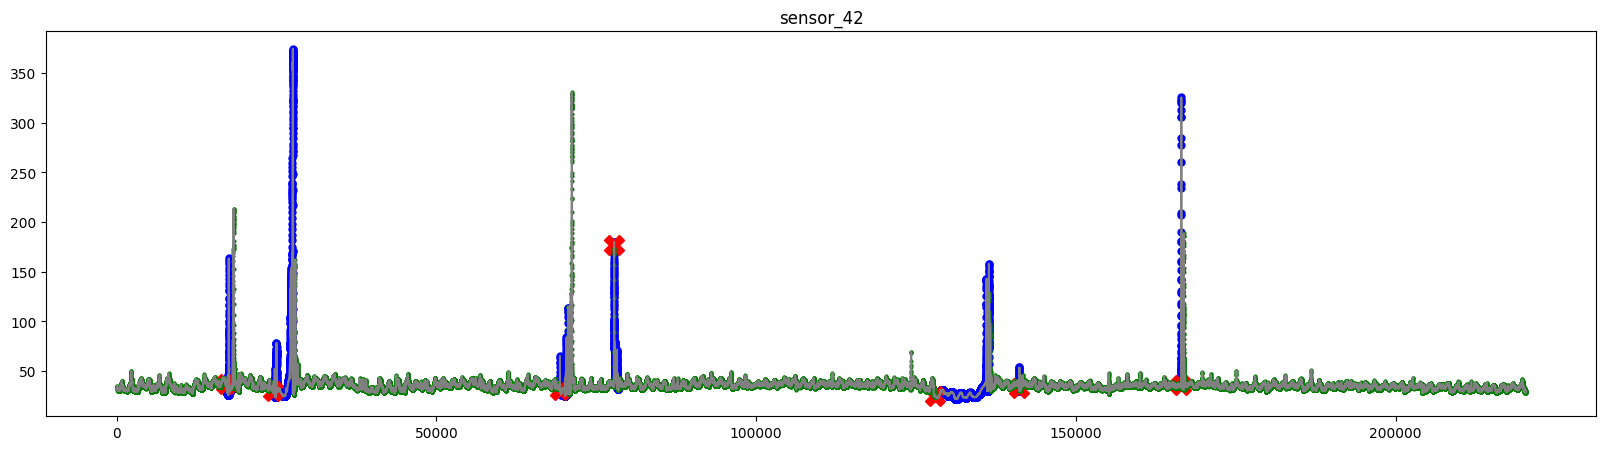

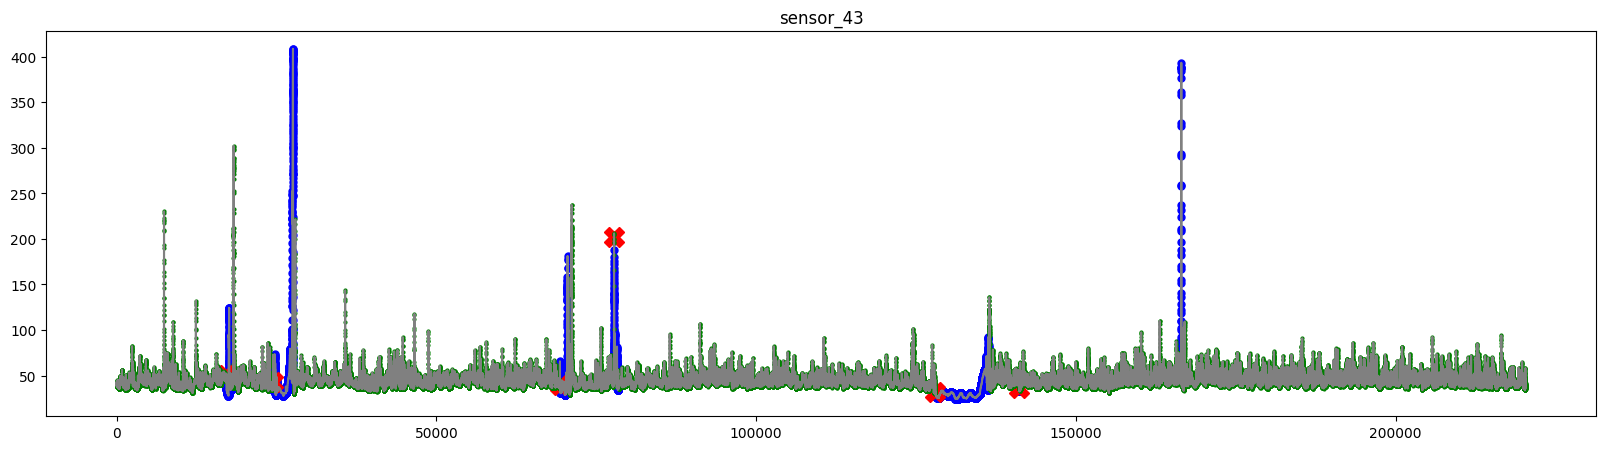

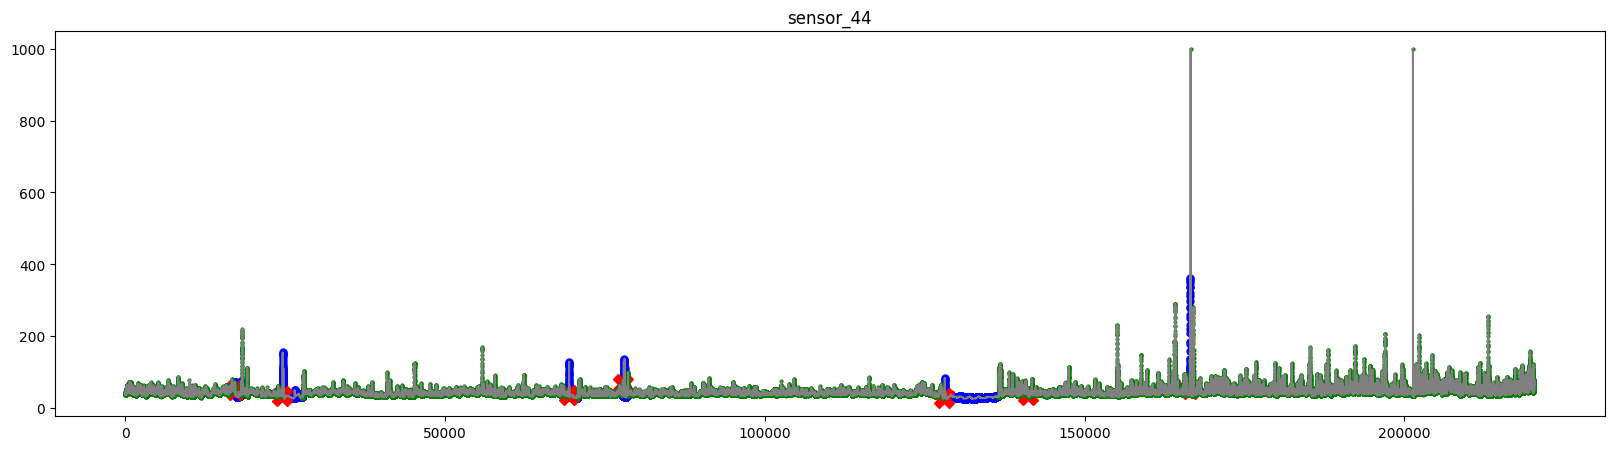

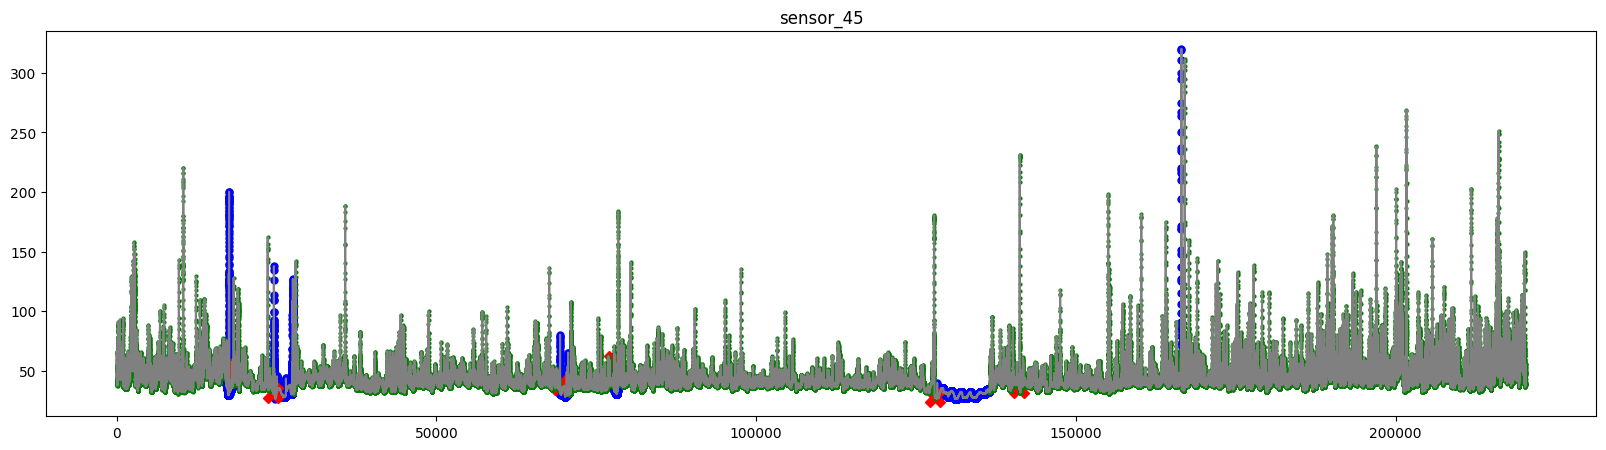

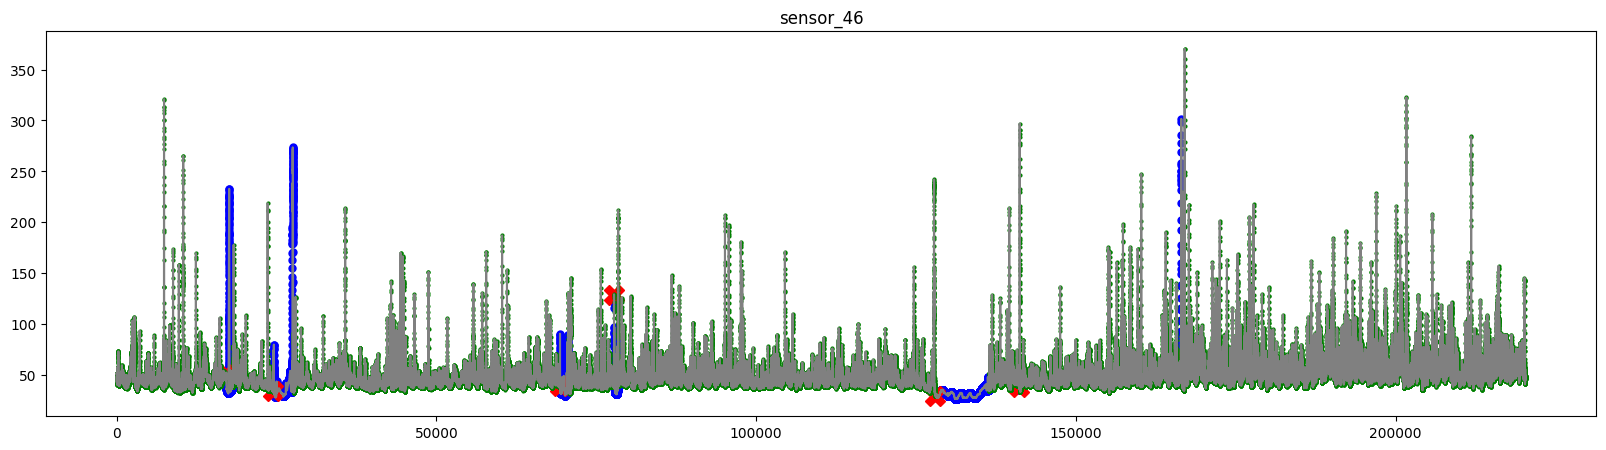

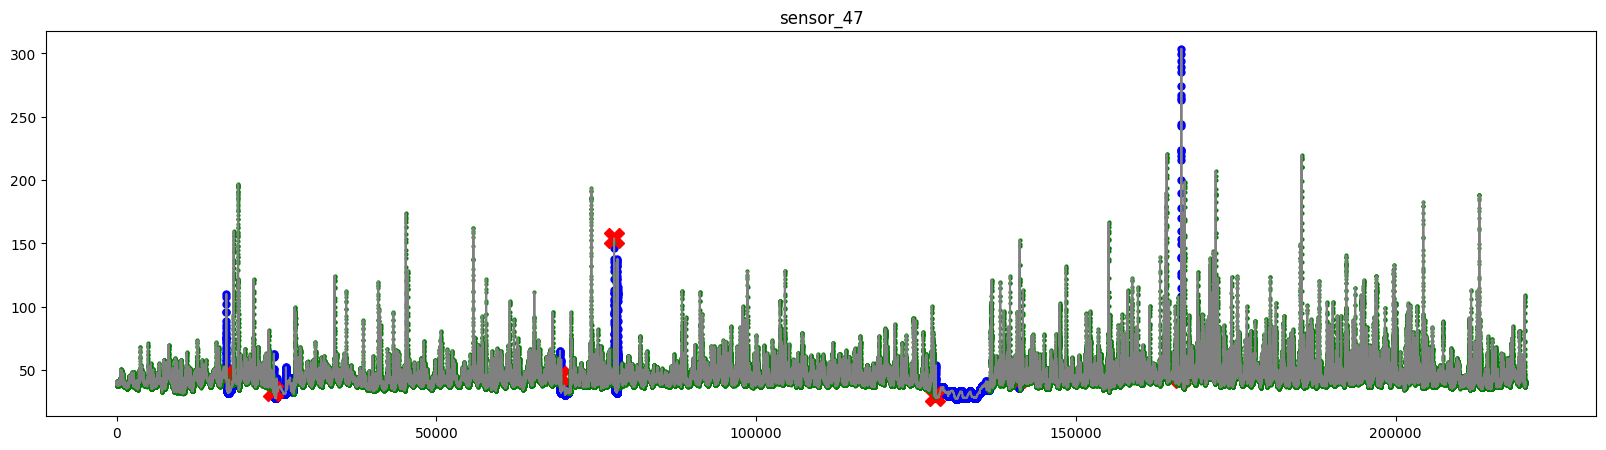

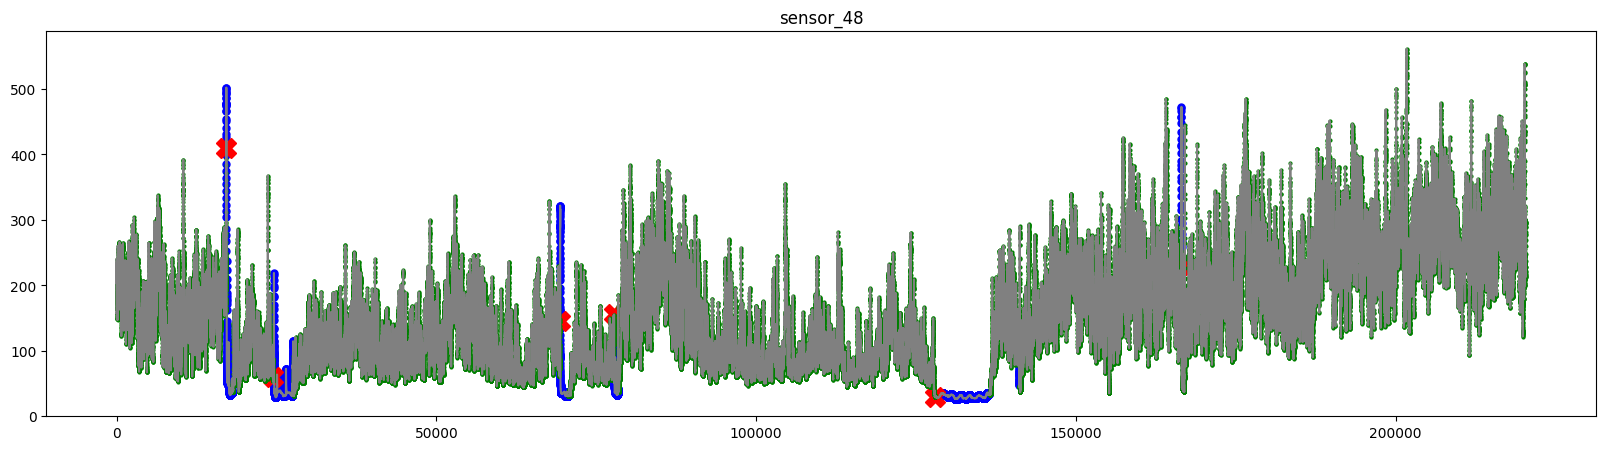

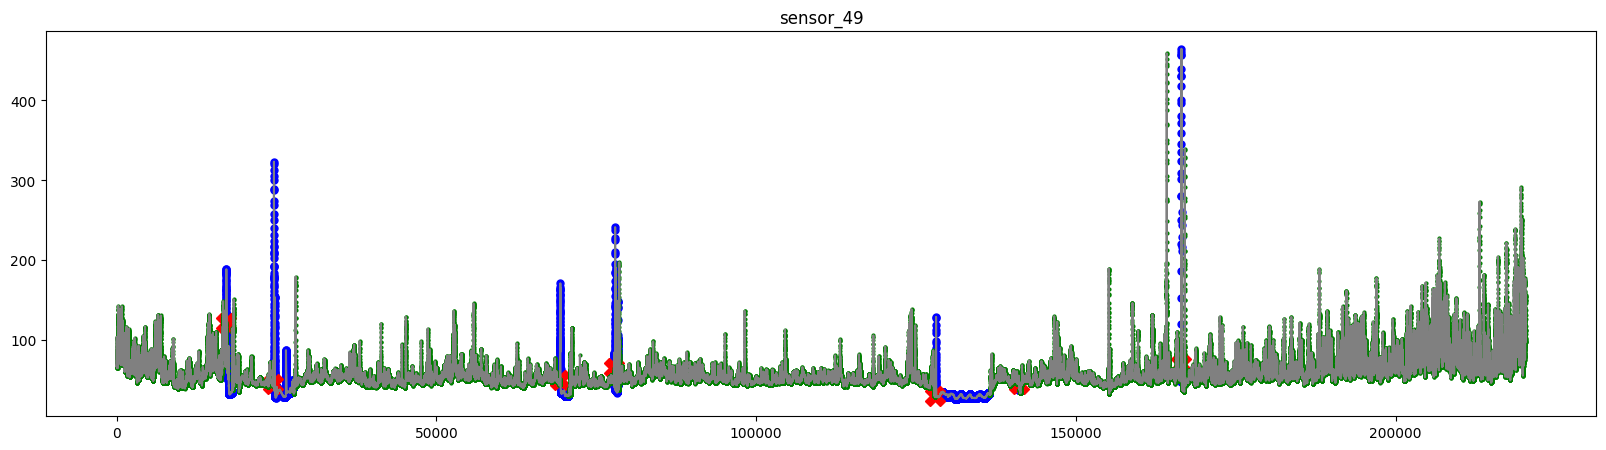

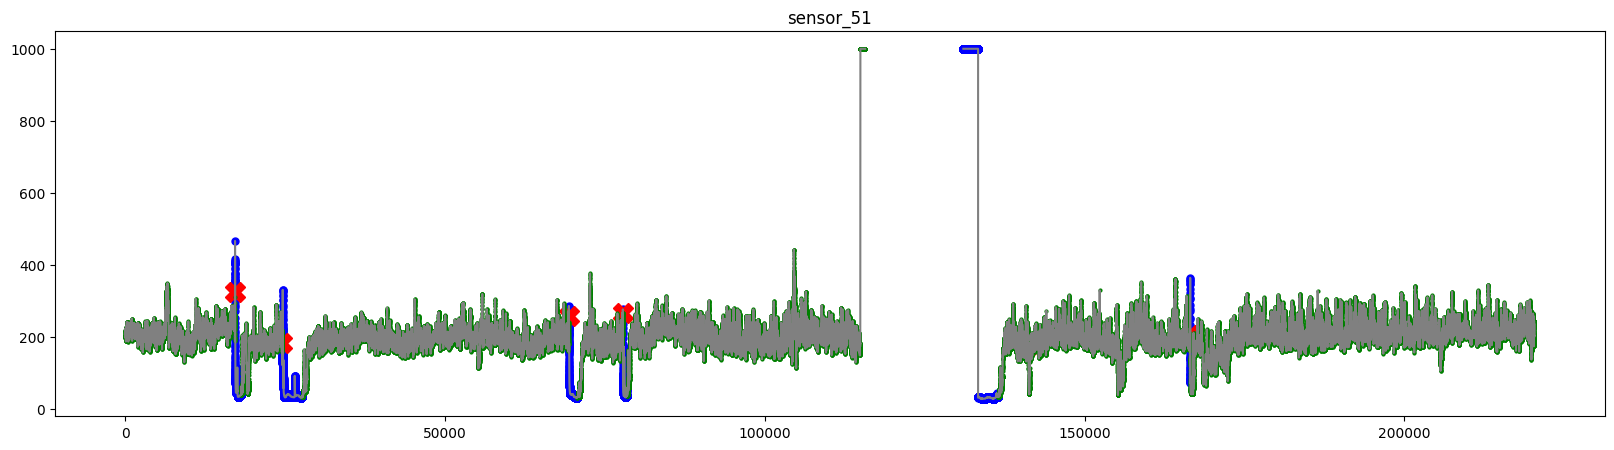

In [8]:
broken = df[df['machine_status'] == 'BROKEN']
recovery = df[df['machine_status'] == 'RECOVERING']
normal = df[df['machine_status'] == 'NORMAL']
def show_sensor(sensors):
    for sensor in sensors:
        plt.figure(figsize=(20,5))
        plt.plot(recovery[sensor], linestyle='none', marker='o', color='blue', markersize=5)
        plt.plot(broken[sensor], linestyle='none', marker='X', color='red', markersize=14)
        plt.plot(normal[sensor], linestyle ='none', marker = 'o', color='green', markersize=2)
        plt.plot(df[sensor], color='grey')
        plt.title(sensor)
        plt.show()
show_sensor(df.iloc[:,1:-1])

In [9]:
# looking for outliers
df.columns[1:-1]

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51'],
      dtype='object')

In [10]:
df['sensor_00'].sort_values()


70603     0.0
17157     0.0
77796     0.0
17156     0.0
17155     0.0
         ... 
145993    NaN
145994    NaN
220008    NaN
220009    NaN
220010    NaN
Name: sensor_00, Length: 220320, dtype: float64

In [11]:
x = df.iloc[:,1:-1].fillna(method = 'ffill')

## Train the models

In [12]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(x)

In [13]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outliers_fraction = 1 - (len(normal)/(len(df))) 

anomaly_algorithms = [
    ("Isolation Forest",IsolationForest(contamination=outliers_fraction, n_jobs = -1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor",LocalOutlierFactor(contamination=outliers_fraction, n_jobs = -1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))]

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ## fit the models: Mind you this takes a lot of time!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
for name, algorithm in anomaly_algorithms:
    print(algorithm)

    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)
    
    df[f'{name}'] = y_pred
    print('-'*100)
    print(f'number of anomolies detected')
    print(df[f'{name}'].value_counts())
    print('-'*100)

IsolationForest(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
Isolation Forest
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06574074074074077)
----------------------------------------------------------------------------------------------------
number of anomolies detected
One-Class SVM
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
Local Outlier Factor
 1    205836
-1     14484
Name: count, dtype: int64
-------------------------------------

## Evaluate the models